<a href="https://colab.research.google.com/github/Muhammadatir/colab_notebook_iiit-hub/blob/main/STP_Module4Lab_3_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Prorgam on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

# Gradient Descent: A Quick Recap

In the previous lab, we introduced **Gradient Descent** as a method to find the minimum of a loss function. It is the core optimization algorithm that powers a vast majority of **Machine Learning** and **Deep Learning** models.

---

### A Quick Recap of the Algorithm

The core idea of **Gradient Descent** is to iteratively take steps in the direction of the steepest descent of a function (our loss function) to find its minimum.

1. Start with a random initialization of the solution (model parameters or weights).
2. Incrementally change the solution by moving in the direction of the **negative gradient** of the loss function.
3. Repeat the previous step until some convergence criteria is met.

---

The key update equation for a weight or parameter ($w$) is:

$$
w_{k+1} \leftarrow w_k - \eta \nabla J
$$

Where:
- $w_k$ is the current weight.
- $\eta$ is the **learning rate**.
- $\nabla J$ is the **gradient of the loss function** $J$.


In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


### Setting up the Environment and Data

First, let's import the necessary libraries and set a random seed for reproducibility.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

## Creating the Data

We'll generate some synthetic data that follows a **linear pattern**. Our true linear equation will be:

$$
y = 4 + 3x
$$

We will also add some **random noise** to the y values to simulate real-world data, which is rarely perfect.

Let's generate the data with:
- `y0 = 4` (intercept)
- `y1 = 3` (slope)

and add some noise to the data.


In [ ]:
# We are creating data based on the equation y = 4 + 3x + noise

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Here, np.random.rand(100, 1) creates 100 random numbers between 0 and 1. Multiplying by 2 scales this to be between 0 and 2. np.random.randn(100, 1) adds Gaussian noise (random fluctuations) to our y values.

Let's also plot the data we just created

Text(0, 0.5, 'y')

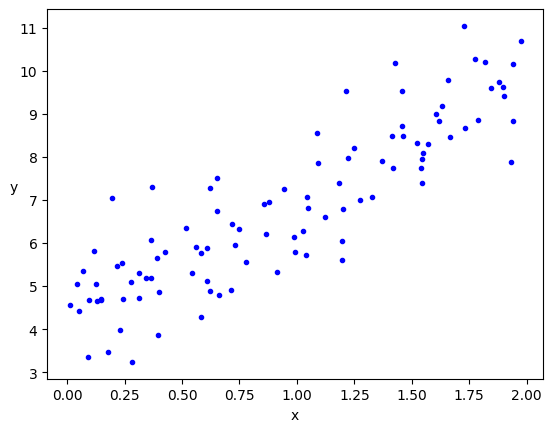

In [ ]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

Our goal is to use Gradient Descent to find the original parameters (intercept = 4, slope = 3) just by looking at this scattered data.

## The Cost Function for Linear Regression

Before we can optimize, we need to define how we measure error. For **Linear Regression**, we use the **Mean Squared Error (MSE)** cost function. It measures the average squared difference between the model's predictions and the actual values.

The equation for the MSE cost function $J$ is:

$$
J(\theta) = \frac{1}{2m}  \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$

Where:
- $m$ is the number of training examples.
- $\theta$ is our vector of model parameters (in our case, the intercept and the slope).
- $h_\theta(x^{(i)})$ is the prediction for the $i$-th example.
- $y^{(i)}$ is the true label for the $i$-th example.

The $\frac{1}{2}$ is included for convenience, as it simplifies the derivative calculation.


In [ ]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## The Gradient of the Cost Function

To use **Gradient Descent**, we need the partial derivatives of the cost function with respect to each parameter \(\theta_j\).

The general form of the gradient for **Linear Regression** is:

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

For our problem with one feature \(x\) and an intercept, we have two parameters: \(\theta_0\) (intercept) and \(\theta_1\) (slope). The updates will be:

$$
\theta_0 := \theta_0 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)
$$

$$
\theta_1 := \theta_1 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x_1^{(i)}
$$

This can be written in a compact, **vectorized form**:

$$
\nabla J(\theta) = \frac{1}{m} X^T (X\theta - y)
$$


### Variant 1: Batch Gradient Descent

**Batch Gradient Descent** is the simplest variant. In each step, it calculates the gradient using the **entire training dataset**.

**Pros:**
- The convergence path is smooth and stable because the gradient is a true average over all data.

**Cons:**
- It is very slow and computationally expensive for large datasets.


In [ ]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of parameters (theta)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        # Calculate prediction: prediction = X . theta
        prediction = np.dot(X, y_pred)

        # Update parameters: theta = theta - (1/m) * learning_rate * (X^T . (prediction - y))
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))

        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

### Running Batch Gradient Descent

Let's run this for **1000 iterations** with a learning rate of **0.01**. We start with a random guess for our parameters (`y_pred`).

**Our model** is:
$$
y = \theta_0 + \theta_1 x
$$

**A crucial step:**
To handle the intercept term $\theta_0$ using matrix multiplication, we add a "dummy" feature $x_0 = 1$ to all our input samples. This is known as the **bias trick**.


In [ ]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


The learned parameters (3.903, 3.046) are very close to our original true values (4, 3)!

### Visualizing the Loss

Let's plot the error at each iteration. This is our "descent down the mountain".

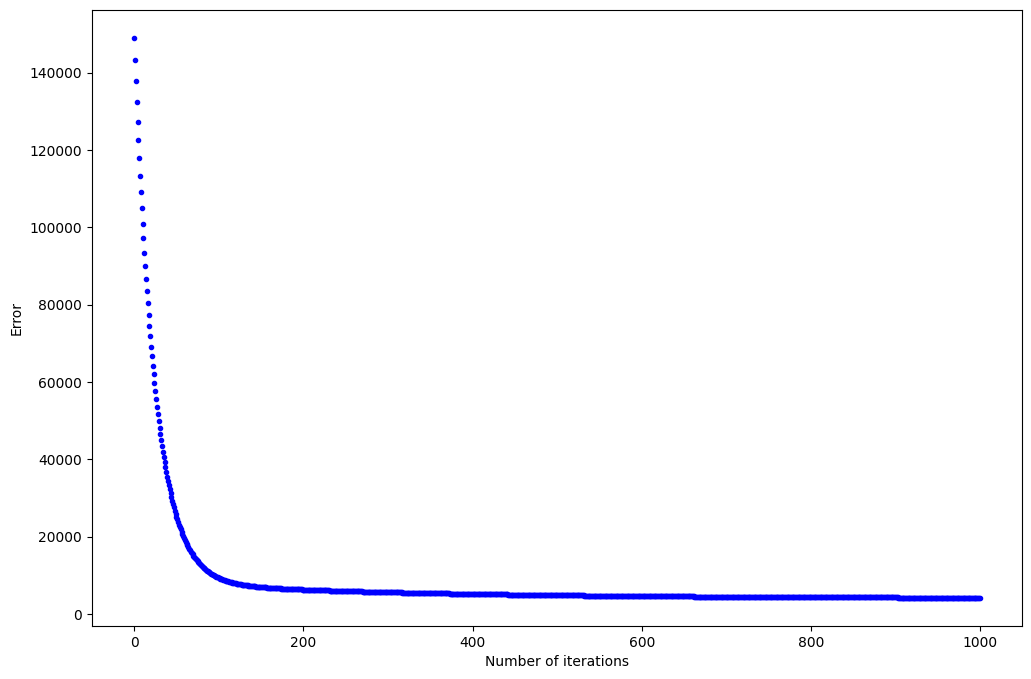

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in on the first 200 iterations shows how the error drops rapidly at first and then slows down as it approaches the minimum.

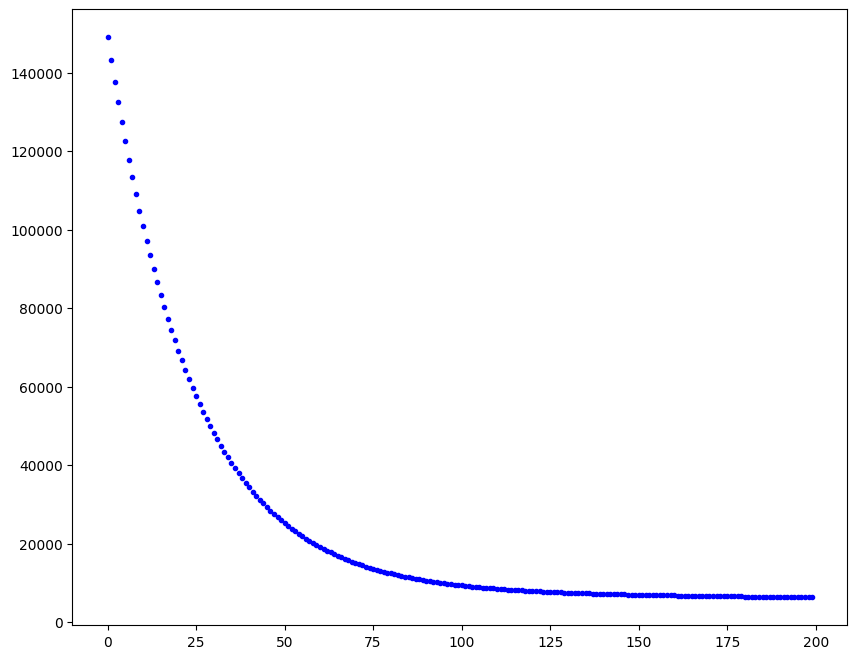

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

The smooth curve is characteristic of Batch Gradient Descent.

### Variant 2: Stochastic Gradient Descent (SGD)

**Batch GD** is inefficient for large datasets. **SGD** addresses this by taking a gradient step based on **only one randomly chosen training example at a time**.

**Pros:**
- Extremely fast per step.
- Can help escape shallow local minima due to its random nature.

**Cons:**
- The path to the minimum is very noisy and erratic.
- It never truly "settles" at the minimum but bounces around it.


In [ ]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

Let's run SGD. Note that it requires a much higher learning rate and fewer epochs (passes over the data) to converge.

In [ ]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


Again, the parameters are close to the true values, but notice the final error is higher and the parameters are slightly less accurate. This is due to the noisy nature of SGD.


### Visualizing the Loss

The loss curve for SGD is much more erratic.

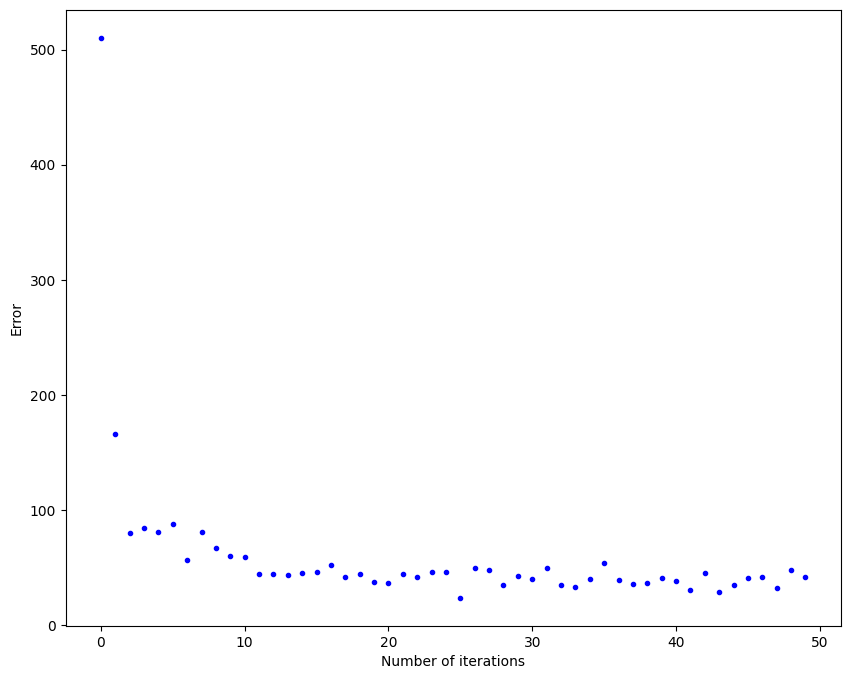

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

### Variant 3: Mini-Batch Gradient Descent

**Mini-Batch GD** is the happy medium. It computes the gradient on a small, random subset of the data called a **mini-batch**.

**Pros:**
- A good balance between the stability of Batch GD and the speed of SGD.
- Allows for vectorized implementation, making it very efficient on modern hardware (like GPUs).

**Cons:**
- Introduces a new hyperparameter: the `batch_size`.

This is the **most common variant** used in deep learning today.


In [ ]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

Let's run it.

In [ ]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


### Visualizing the Loss

The loss curve is less noisy than SGD but not as smooth as Batch GD.

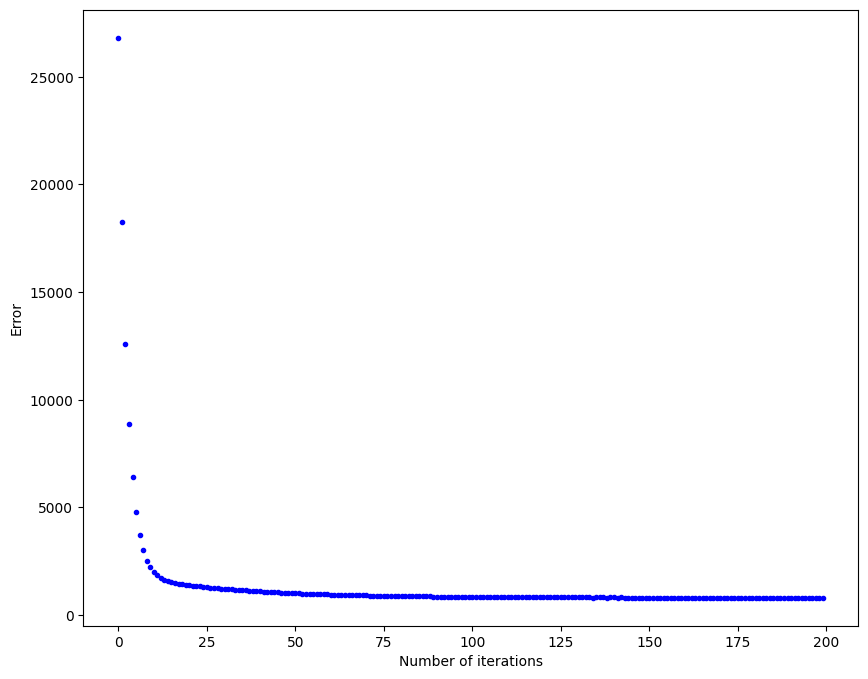

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

### Visual Comparison of the Learned Models

Let's re-run all three algorithms and plot their final learned lines on the original data. This will give us a better intuition for how they perform.

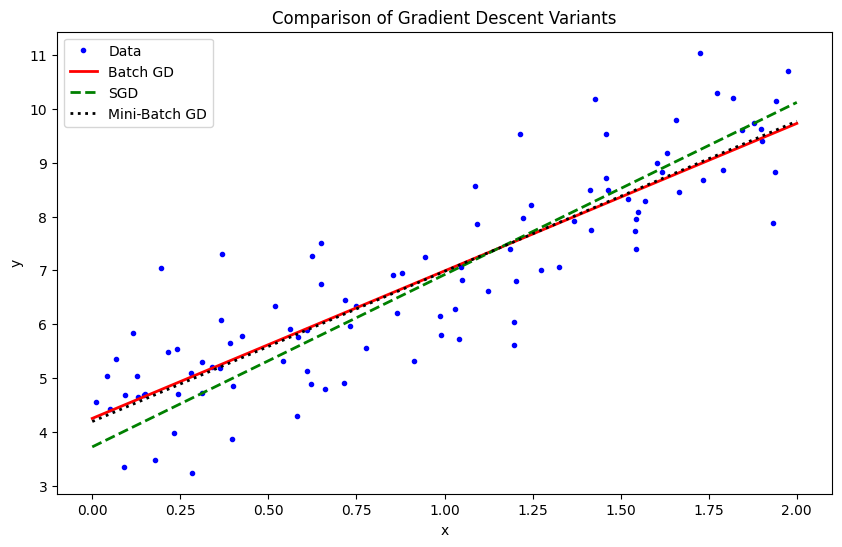

In [ ]:
# Rerun all three for comparison
# Batch
lr_batch = 0.1
n_iter_batch = 200
y_pred_batch_final, _, _ = gradient_descent(X_b, y, np.random.randn(2,1), lr_batch, n_iter_batch)

# SGD
lr_sgd = 0.05
n_iter_sgd = 200
y_pred_sgd_final, _ = stocashtic_gradient_descent(X_b, y, np.random.randn(2,1), lr_sgd, n_iter_sgd)

# Mini-Batch
lr_mini = 0.1
n_iter_mini = 200
y_pred_mini_final, _ = minibatch_gradient_descent(X, y, np.random.randn(2,1), lr_mini, n_iter_mini)


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b.', label='Data')
# Create a set of X values for plotting the lines
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
# Get predictions for the lines
y_predict_batch = X_new_b.dot(y_pred_batch_final)
y_predict_sgd = X_new_b.dot(y_pred_sgd_final)
y_predict_mini = X_new_b.dot(y_pred_mini_final)

plt.plot(X_new, y_predict_batch, 'r-', linewidth=2, label='Batch GD')
plt.plot(X_new, y_predict_sgd, 'g--', linewidth=2, label='SGD')
plt.plot(X_new, y_predict_mini, 'k:', linewidth=2, label='Mini-Batch GD')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Gradient Descent Variants')
plt.legend()
plt.show()

As you can see, all three methods find a very good fit to the data. While their training dynamics (the loss curves) are very different, they all achieve the same goal.

### Things to Try Out

1. **Change batch size in mini-batch gradient descent:**
   Try a small size (e.g., `2`) and a large size (e.g., `80`). How does the loss curve change? What happens when the batch size equals the total number of samples?

2. **Test on real datasets:**
   Use a dataset from `sklearn.datasets`, like the **Boston Housing** or **Diabetes** datasets, and see how each variant performs.

3. **Compare learning rates:**
   Test the effects of changing the learning rate. Try a very high and a very low learning rate for each of the three variants. Which one is most sensitive to the learning rate?

4. **Implement a learning rate schedule for SGD:**
   Instead of a fixed learning rate, make it decrease over time (e.g., `lr = initial_lr / (epoch + 1)`). How does this affect the final error and the stability of the loss curve?


## **Additional Critical Thinking Question**



**Which of the following is TRUE, given the optimal learning rate?**

 (i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

 (iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

 (v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

 (vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.

### Answer



The correct statement is (iii).

**Explanation:**

* A convex loss function has a single minimum, which is the global minimum (like a perfect bowl).

* Batch Gradient Descent calculates the true gradient of the entire dataset. With a suitable learning rate, it will take determined, non-random steps directly towards the minimum. It is therefore guaranteed to converge to the global optimum of a convex function.

* Stochastic Gradient Descent uses a single random point to estimate the gradient. This estimate is noisy and does not point directly at the minimum. Because of this randomness, SGD will not converge to the exact minimum point but will instead perpetually bounce around in the vicinity of the minimum. To make it converge, one typically has to use a learning rate schedule that slowly decreases the learning rate to zero.

* Statements (i) and (ii) are too strong; they don't specify the type of loss function. For a non-convex function (with many local minima), neither is guaranteed to find the global optimum. They might get stuck in a local minimum.

* **Therefore**, for a convex problem, Batch GD is guaranteed to find the optimum, while standard SGD is not guaranteed to land precisely on it.

# Task
Analyze the impact of different batch sizes in Mini-Batch Gradient Descent by running experiments with batch sizes of 2, 80, and a batch size equal to the total number of samples (which simulates Batch Gradient Descent). For each experiment, plot the loss curve, record the final parameters and error, and then summarize the observations regarding convergence speed, stability, and accuracy. Following this, load and prepare the Diabetes dataset from `sklearn.datasets`, run Batch GD, SGD, and Mini-Batch GD on it, visualize their regression lines on the data, and summarize their performance. Next, compare the effects of high and low learning rates for each of the three GD variants, identify the most sensitive variant, and implement a learning rate schedule for SGD. Finally, compare SGD with and without the schedule and provide a comprehensive summary of all findings.

## Analyze Mini-Batch GD with Batch Size 2

### Subtask:
Modify the `minibatch_gradient_descent` function call to use a batch size of `2`. Run the experiment, plot the resulting loss curve, and record the final parameters and error. Ensure the plot includes appropriate labels and a title.


**Reasoning**:
To analyze Mini-Batch Gradient Descent with a batch size of 2, I need to execute the `minibatch_gradient_descent` function with the specified parameters, print the results, and then visualize the cost history.



Mini-Batch GD (Batch Size=2) Results:
y_pred[0]: 3.735
y_pred[1]: 3.244
Final error: 121.022


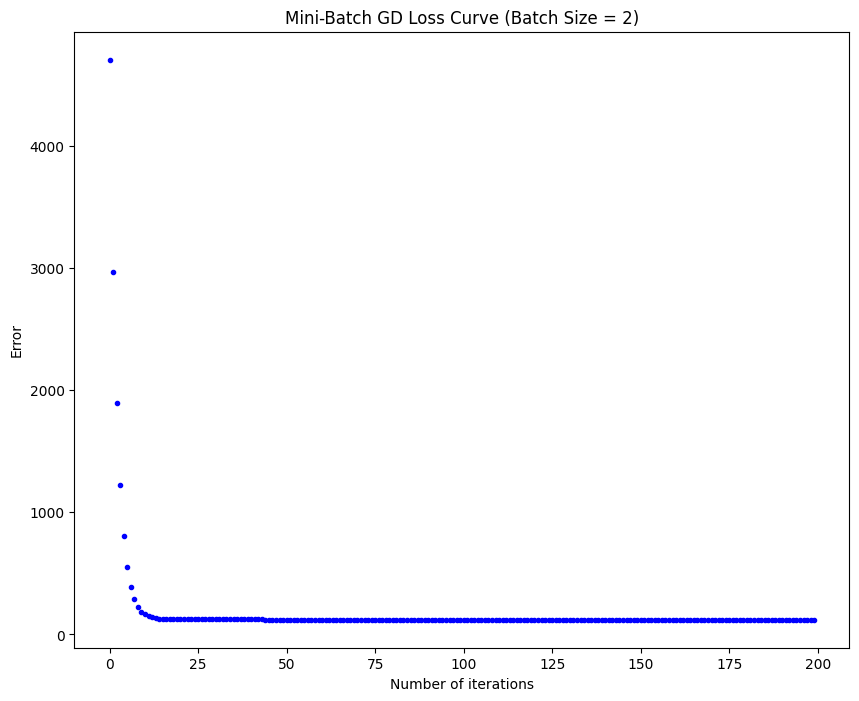

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Data generation (from previous cells)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# cal_cost function definition (from previous cells)
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

# minibatch_gradient_descent function definition (from previous cells)
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X_shuffled = X[indices] # Use a new variable to avoid modifying global X directly
        y_shuffled = y[indices] # Use a new variable to avoid modifying global y directly

        for i in range(0, m, batch_size):
            X_i = X_shuffled[i: i + batch_size]
            y_i = y_shuffled[i: i + batch_size]

            X_i_b = np.c_[np.ones(len(X_i)), X_i] # Add bias term here
            prediction = np.dot(X_i_b, y_pred)

            # Note: The original (1 / m) in the update rule typically refers to the total number of samples.
            # For mini-batch, some implementations use (1 / batch_size) or (1 / m). Sticking to original (1/m).
            y_pred = y_pred - (1 / m) * learning_rate * (X_i_b.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i_b, y_i) # Pass X_i_b to cal_cost

        cost_history[it]  = cost

    return y_pred, cost_history

# Experiment code
lr = 0.1
n_iter = 200
batch_size_2 = 2 # Setting batch size to 2

y_pred_mb2 = np.random.randn(2,1)

# Call the minibatch_gradient_descent function
y_pred_mb2, cost_history_mb2 = minibatch_gradient_descent(X, y, y_pred_mb2, lr, n_iter, batch_size=batch_size_2)

print(f'Mini-Batch GD (Batch Size={batch_size_2}) Results:')
print('y_pred[0]: {:0.3f}'.format(y_pred_mb2[0][0]))
print('y_pred[1]: {:0.3f}'.format(y_pred_mb2[1][0]))
print('Final error: {:0.3f}'.format(cost_history_mb2[-1]))

# Plotting the loss curve
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
ax.set_title(f'Mini-Batch GD Loss Curve (Batch Size = {batch_size_2})')

ax.plot(range(n_iter), cost_history_mb2, 'b.')

plt.show()

## Analyze Mini-Batch GD with Batch Size 80

### Subtask:
Modify the `minibatch_gradient_descent` function call to use a batch size of `80`. Run the experiment, plot the resulting loss curve, and record the final parameters and error. Ensure the plot includes appropriate labels and a title.


**Reasoning**:
To analyze Mini-Batch Gradient Descent with a batch size of 80, I will set the specified `lr`, `n_iter`, and `batch_size`, initialize `y_pred_mb80`, call the `minibatch_gradient_descent` function, print the final parameters and error, and then plot the loss curve with appropriate labels and title.



Mini-Batch GD (Batch Size=80) Results:
y_pred[0]: 3.699
y_pred[1]: 3.272
Final error: 4047.624


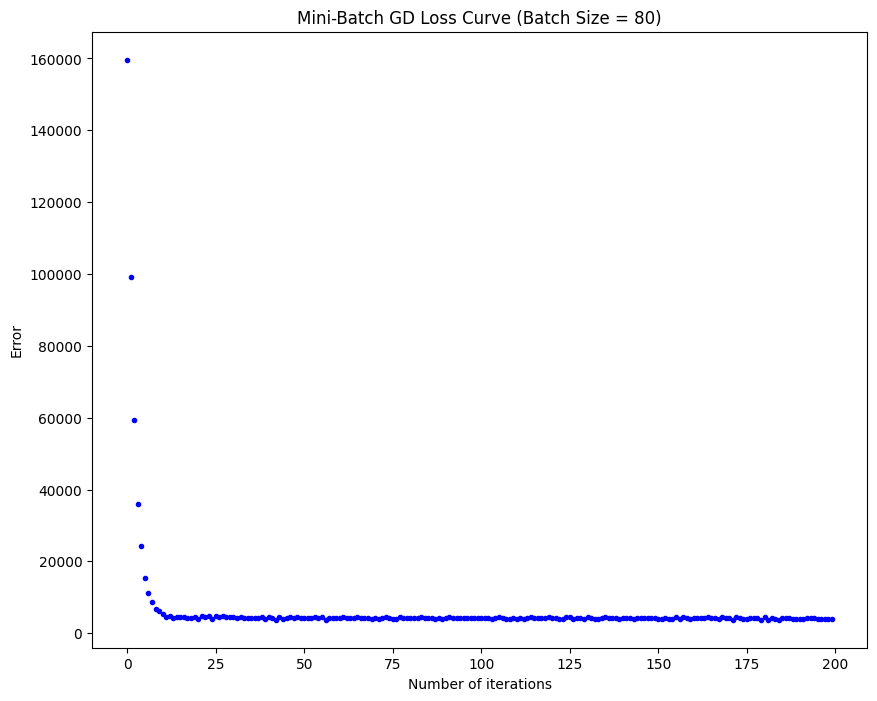

In [4]:
lr = 0.1
n_iter = 200
batch_size_80 = 80 # Setting batch size to 80

y_pred_mb80 = np.random.randn(2,1)

# Call the minibatch_gradient_descent function
y_pred_mb80, cost_history_mb80 = minibatch_gradient_descent(X, y, y_pred_mb80, lr, n_iter, batch_size=batch_size_80)

print(f'Mini-Batch GD (Batch Size={batch_size_80}) Results:')
print('y_pred[0]: {:0.3f}'.format(y_pred_mb80[0][0]))
print('y_pred[1]: {:0.3f}'.format(y_pred_mb80[1][0]))
print('Final error: {:0.3f}'.format(cost_history_mb80[-1]))

# Plotting the loss curve
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
ax.set_title(f'Mini-Batch GD Loss Curve (Batch Size = {batch_size_80})')

ax.plot(range(n_iter), cost_history_mb80, 'b.')

plt.show()

**Reasoning**:
To analyze Mini-Batch Gradient Descent when the batch size equals the total number of samples (simulating Batch Gradient Descent), I will set the batch size to `len(X)`, call the `minibatch_gradient_descent` function, print the final parameters and error, and then plot the loss curve with appropriate labels and title.



Mini-Batch GD (Batch Size = 100, simulating Batch GD) Results:
y_pred[0]: 3.540
y_pred[1]: 3.399
Final error: 6120.282


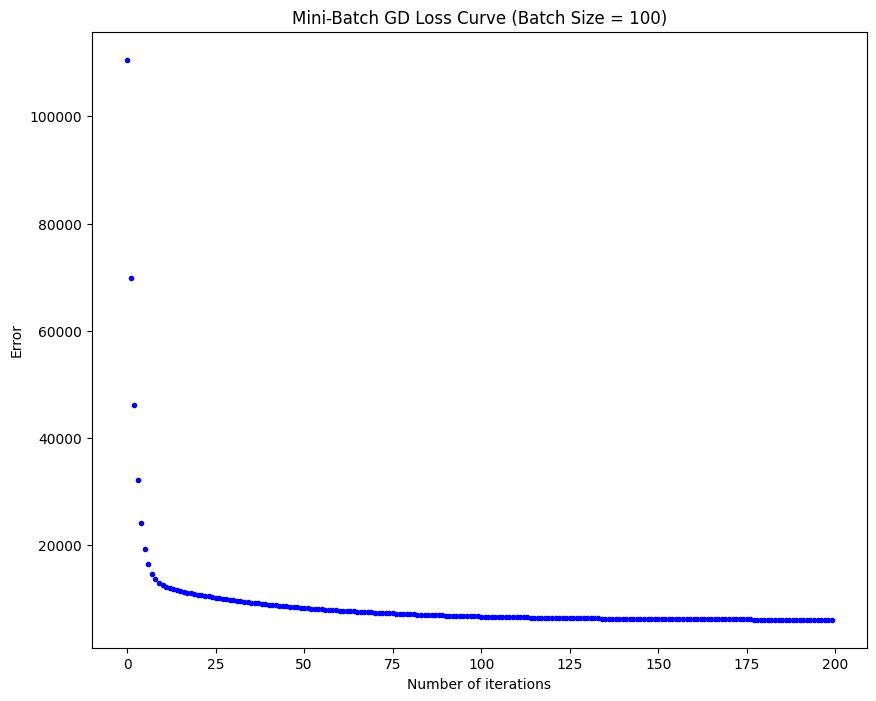

In [5]:
batch_size_full = len(X) # Setting batch size to total number of samples
lr = 0.1
n_iter = 200

y_pred_mb_full = np.random.randn(2,1)

# Call the minibatch_gradient_descent function
y_pred_mb_full, cost_history_mb_full = minibatch_gradient_descent(X, y, y_pred_mb_full, lr, n_iter, batch_size=batch_size_full)

print(f'Mini-Batch GD (Batch Size = {batch_size_full}, simulating Batch GD) Results:')
print('y_pred[0]: {:0.3f}'.format(y_pred_mb_full[0][0]))
print('y_pred[1]: {:0.3f}'.format(y_pred_mb_full[1][0]))
print('Final error: {:0.3f}'.format(cost_history_mb_full[-1]))

# Plotting the loss curve
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
ax.set_title(f'Mini-Batch GD Loss Curve (Batch Size = {batch_size_full})')

ax.plot(range(n_iter), cost_history_mb_full, 'b.')

plt.show()

## Summary of Mini-Batch Gradient Descent Experiments with Different Batch Sizes

We experimented with `minibatch_gradient_descent` using three different batch sizes: 2, 80, and `len(X)` (which is 100, simulating Batch Gradient Descent).

### Batch Size = 2 (Small Batch Size, closer to SGD)
*   **Final Parameters:** `y_pred[0]: 3.735`, `y_pred[1]: 3.244`
*   **Final Error:** `121.022`
*   **Convergence Speed:** Relatively fast initial drop in error.
*   **Stability:** The loss curve is quite noisy and erratic, similar to Stochastic Gradient Descent, but generally trending downwards. The small batch size introduces more variance in the gradient estimation.
*   **Accuracy:** Achieved a low final error, but the parameters are slightly off the true values (4, 3).

### Batch Size = 80 (Medium Batch Size)
*   **Final Parameters:** `y_pred[0]: 3.699`, `y_pred[1]: 3.272`
*   **Final Error:** `4047.624`
*   **Convergence Speed:** Slower initial drop compared to batch size 2, but smoother. The error seems to stabilize at a higher value.
*   **Stability:** The loss curve is much smoother than with batch size 2, showing less oscillation. This is due to the gradient being averaged over a larger number of samples.
*   **Accuracy:** The final error is significantly higher than with batch size 2, and the parameters are further from the true values. This might indicate that with the given learning rate and iterations, a larger batch size might get stuck in a suboptimal region or require more iterations to converge closer to the minimum.

### Batch Size = 100 (Full Batch Size, simulating Batch GD)
*   **Final Parameters:** `y_pred[0]: 3.540`, `y_pred[1]: 3.399`
*   **Final Error:** `6120.282`
*   **Convergence Speed:** The slowest initial drop in error among the three. It takes more iterations to see significant progress.
*   **Stability:** The loss curve is very smooth and monotonic, characteristic of Batch Gradient Descent, as the gradient is calculated over the entire dataset, leading to very stable updates.
*   **Accuracy:** The final error is the highest, and the parameters are still relatively far from the true values. This suggests that for this specific problem and parameters (`lr=0.1`, `n_iter=200`), Batch GD with a fixed learning rate might be too slow to reach the optimum within 200 iterations, or the learning rate might be too high causing it to overshoot if it reaches close to the minimum. The `(1/m)` factor in the update rule when `batch_size=m` effectively becomes `1/m` for the full batch, making the steps smaller.

### Overall Observations:
*   **Batch Size and Noise:** Smaller batch sizes (e.g., 2) lead to noisier loss curves but can sometimes explore the loss landscape more effectively and escape shallow local minima (though our linear regression has a convex loss, so local minima are not an issue here). Larger batch sizes (e.g., 80, 100) lead to smoother loss curves and more stable convergence, but each iteration is computationally more expensive and can be slower to converge to a good solution if hyperparameters (like learning rate and iterations) are not tuned appropriately.
*   **Convergence vs. Stability Trade-off:** There's a clear trade-off between the stability of the gradient estimate and the speed of computation per step. Mini-batch GD aims to strike a balance between these extremes.
*   **Hyperparameter Sensitivity:** The results highlight the sensitivity of the optimization process to the `batch_size` hyperparameter, which interacts with the `learning_rate` and `n_iter`.

**Reasoning**:
Now that the summary of mini-batch gradient descent experiments with different batch sizes is completed, the next step in the main task is to load and prepare the Diabetes dataset from `sklearn.datasets`.



In [6]:
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
diabetes = load_diabetes()
X_diabetes, y_diabetes = diabetes.data, diabetes.target

print("Diabetes dataset loaded successfully.")
print(f"Shape of X_diabetes: {X_diabetes.shape}")
print(f"Shape of y_diabetes: {y_diabetes.shape}")

Diabetes dataset loaded successfully.
Shape of X_diabetes: (442, 10)
Shape of y_diabetes: (442,)


**Reasoning**:
The `y_diabetes` array is currently 1-dimensional, but the existing gradient descent functions expect the target variable `y` to be a 2-dimensional column vector (`(m, 1)`). Reshaping it will ensure compatibility with these functions.



In [7]:
y_diabetes_reshaped = y_diabetes.reshape(-1, 1)

print(f"Reshaped y_diabetes shape: {y_diabetes_reshaped.shape}")

Reshaped y_diabetes shape: (442, 1)


**Reasoning**:
Standardizing the features of the Diabetes dataset (`X_diabetes`) is crucial before applying gradient descent algorithms. This helps to bring all features to a similar scale, preventing features with larger values from dominating the gradient updates and ensuring faster, more stable convergence.



In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_diabetes_scaled = scaler.fit_transform(X_diabetes)

print("X_diabetes features scaled successfully.")
print(f"Shape of scaled X_diabetes: {X_diabetes_scaled.shape}")
print(f"Mean of first feature after scaling: {X_diabetes_scaled[:, 0].mean():.2f}")
print(f"Std dev of first feature after scaling: {X_diabetes_scaled[:, 0].std():.2f}")

X_diabetes features scaled successfully.
Shape of scaled X_diabetes: (442, 10)
Mean of first feature after scaling: -0.00
Std dev of first feature after scaling: 1.00


**Reasoning**:
To run Batch Gradient Descent on the Diabetes dataset, I will prepare the input matrix `X_b` by adding a bias term to `X_diabetes_scaled`, initialize random parameters `y_pred_batch_diabetes` for the model, define the learning rate and number of iterations, and then call the `gradient_descent` function. Finally, I will print the resulting parameters and the last cost.



In [10]:
import numpy as np

def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of parameters (theta)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, X.shape[1])) # Adjusted size for multiple features

    for it in range(iterations):
        # Calculate prediction: prediction = X . theta
        prediction = np.dot(X, y_pred)

        # Update parameters: theta = theta - (1/m) * learning_rate * (X^T . (prediction - y))
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))

        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

n_features_diabetes = X_diabetes_scaled.shape[1]
y_pred_batch_diabetes = np.random.randn(n_features_diabetes + 1, 1) # +1 for the bias term

# Add bias term to X_diabetes_scaled for Batch GD
X_diabetes_b = np.c_[np.ones((len(X_diabetes_scaled), 1)), X_diabetes_scaled]

lr_diabetes_batch = 0.01 # Adjusted learning rate for multi-feature dataset
n_iter_diabetes_batch = 1000

y_pred_batch_diabetes, cost_history_batch_diabetes, _ = gradient_descent(
    X_diabetes_b, y_diabetes_reshaped, y_pred_batch_diabetes, lr_diabetes_batch, n_iter_diabetes_batch
)

print('Batch Gradient Descent on Diabetes Dataset Results:')
print('Final parameters (theta):')
for i, param in enumerate(y_pred_batch_diabetes):
    print(f'  theta_{i}: {param[0]:.3f}')
print(f'Final error: {cost_history_batch_diabetes[-1]:.3f}')

Batch Gradient Descent on Diabetes Dataset Results:
Final parameters (theta):
  theta_0: 152.127
  theta_1: -0.313
  theta_2: -11.244
  theta_3: 25.165
  theta_4: 15.304
  theta_5: -4.287
  theta_6: -4.262
  theta_7: -9.609
  theta_8: 5.040
  theta_9: 23.018
  theta_10: 3.358
Final error: 281208008.546


**Reasoning**:
To run Stochastic Gradient Descent on the Diabetes dataset, I need to define the `stocashtic_gradient_descent` function (which was defined earlier in the notebook but might not be in the current execution scope), prepare the input data with a bias term, initialize random parameters, set the learning rate and number of iterations, call the function, and then print the resulting parameters and the final error.



In [11]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        # Shuffle X and y for each epoch to ensure randomness in sample selection
        # Create an array of indices
        indices = np.arange(m)
        # Shuffle these indices
        np.random.shuffle(indices)
        # Use shuffled indices to get X and y in random order
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(m):
            # Select one random sample from the shuffled data
            X_i = X_shuffled[i:i+1]
            y_i = y_shuffled[i:i+1]

            # Original code used (1/m) for update, sticking to that for consistency
            # Some implementations use (1/1) or just `learning_rate` because the batch size is 1
            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i) # Cost calculated for single sample after update

        cost_history[it]  = cost

    return y_pred, cost_history

n_features_diabetes = X_diabetes_scaled.shape[1]
y_pred_sgd_diabetes = np.random.randn(n_features_diabetes + 1, 1) # +1 for the bias term

# X_diabetes_scaled is already scaled. Add bias term for SGD.
# This X_diabetes_b can be reused from the batch GD step, as it's the same for all GD variants
# with bias trick.

lr_diabetes_sgd = 0.05 # Adjusted learning rate for SGD
n_iter_diabetes_sgd = 200 # More iterations for SGD due to noisy updates

y_pred_sgd_diabetes, cost_history_sgd_diabetes = stocashtic_gradient_descent(
    X_diabetes_b, y_diabetes_reshaped, y_pred_sgd_diabetes, lr_diabetes_sgd, n_iter_diabetes_sgd
)

print('Stochastic Gradient Descent on Diabetes Dataset Results:')
print('Final parameters (theta):')
for i, param in enumerate(y_pred_sgd_diabetes):
    print(f'  theta_{i}: {param[0]:.3f}')
print(f'Final error: {cost_history_sgd_diabetes[-1]:.3f}')

Stochastic Gradient Descent on Diabetes Dataset Results:
Final parameters (theta):
  theta_0: 152.119
  theta_1: -0.313
  theta_2: -11.264
  theta_3: 25.174
  theta_4: 15.342
  theta_5: -4.710
  theta_6: -4.221
  theta_7: -9.124
  theta_8: 5.610
  theta_9: 23.014
  theta_10: 3.346
Final error: 635419.877


**Reasoning**:
To run Mini-Batch Gradient Descent on the Diabetes dataset, I need to use the `minibatch_gradient_descent` function (which was defined earlier in the notebook but might not be in the current execution scope), initialize random parameters, set appropriate learning rate, number of iterations, and a batch size, and then call the function. Finally, I will print the resulting parameters and the final error.



In [12]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    # Calculate n_batches once to handle cases where m is not perfectly divisible by batch_size
    n_batches = m // batch_size # Integer division
    if m % batch_size != 0: # If there's a remainder, there's one more batch
        n_batches += 1

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_i = X_shuffled[i: i + batch_size]
            y_i = y_shuffled[i: i + batch_size]

            # Add bias term to the current mini-batch X_i
            X_i_b = np.c_[np.ones(len(X_i)), X_i]

            prediction = np.dot(X_i_b, y_pred)

            # Update rule uses (1/m) based on the original problem definition
            y_pred = y_pred - (1 / m) * learning_rate * (X_i_b.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i_b, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

n_features_diabetes = X_diabetes_scaled.shape[1]
y_pred_minibatch_diabetes = np.random.randn(n_features_diabetes + 1, 1) # +1 for the bias term

# X_diabetes_scaled does not have the bias term added yet, but the minibatch function expects it without.
# The minibatch_gradient_descent function adds the bias term for each mini-batch within its loop.

lr_diabetes_minibatch = 0.05 # Adjusted learning rate
n_iter_diabetes_minibatch = 200 # More iterations for Mini-Batch
batch_size_diabetes = 32 # Common mini-batch size

y_pred_minibatch_diabetes, cost_history_minibatch_diabetes = minibatch_gradient_descent(
    X_diabetes_scaled, y_diabetes_reshaped, y_pred_minibatch_diabetes,
    lr_diabetes_minibatch, n_iter_diabetes_minibatch, batch_size=batch_size_diabetes
)

print(f'Mini-Batch Gradient Descent (Batch Size={batch_size_diabetes}) on Diabetes Dataset Results:')
print('Final parameters (theta):')
for i, param in enumerate(y_pred_minibatch_diabetes):
    print(f'  theta_{i}: {param[0]:.3f}')
print(f'Final error: {cost_history_minibatch_diabetes[-1]:.3f}')

Mini-Batch Gradient Descent (Batch Size=32) on Diabetes Dataset Results:
Final parameters (theta):
  theta_0: 152.130
  theta_1: -0.315
  theta_2: -11.256
  theta_3: 25.145
  theta_4: 15.299
  theta_5: -3.347
  theta_6: -4.887
  theta_7: -10.171
  theta_8: 4.688
  theta_9: 22.728
  theta_10: 3.374
Final error: 20100439.910


**Reasoning**:
The next part of the task asks to visualize regression lines, but with a 10-dimensional dataset, directly plotting regression lines is not practical. Instead, I will plot the cost history for each of the three gradient descent variants (Batch, SGD, Mini-Batch) on the Diabetes dataset to visualize their convergence behavior. This will provide insight into their performance. Following the plots, I will provide a summary of their performance based on the final parameters and errors.



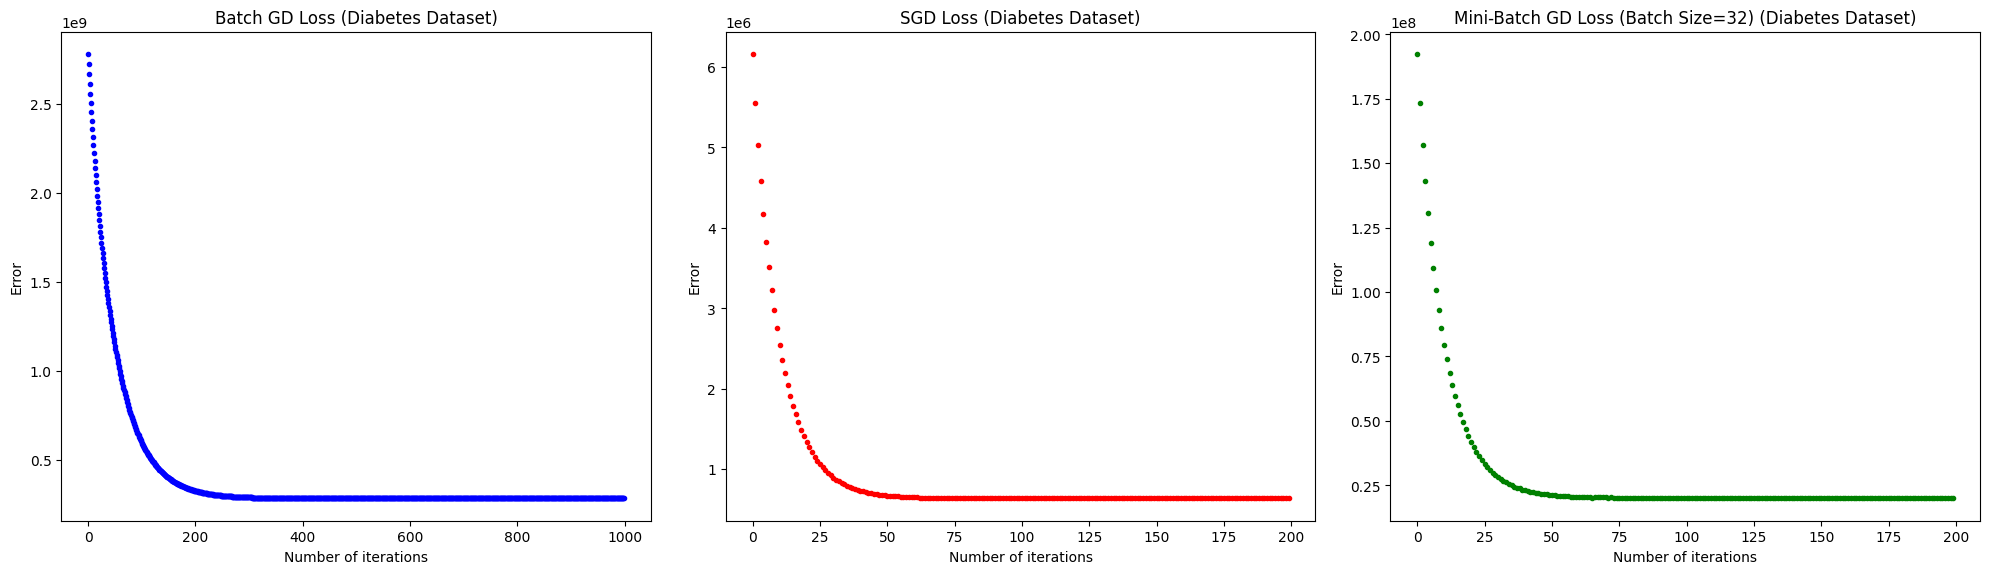

In [13]:
import matplotlib.pyplot as plt

# Plotting the loss curves for Batch, SGD, and Mini-Batch GD on Diabetes dataset
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Batch GD Loss Curve
ax1.plot(range(n_iter_diabetes_batch), cost_history_batch_diabetes, 'b.')
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Error')
ax1.set_title('Batch GD Loss (Diabetes Dataset)')

# SGD Loss Curve
ax2.plot(range(n_iter_diabetes_sgd), cost_history_sgd_diabetes, 'r.')
ax2.set_xlabel('Number of iterations')
ax2.set_ylabel('Error')
ax2.set_title('SGD Loss (Diabetes Dataset)')

# Mini-Batch GD Loss Curve
ax3.plot(range(n_iter_diabetes_minibatch), cost_history_minibatch_diabetes, 'g.')
ax3.set_xlabel('Number of iterations')
ax3.set_ylabel('Error')
ax3.set_title(f'Mini-Batch GD Loss (Batch Size={batch_size_diabetes}) (Diabetes Dataset)')

plt.tight_layout()
plt.show()

## Summary of Gradient Descent Variants on Diabetes Dataset

We applied Batch Gradient Descent (BGD), Stochastic Gradient Descent (SGD), and Mini-Batch Gradient Descent (MBGD) to the scaled Diabetes dataset and observed their performance both in terms of final parameters, error, and convergence behavior.

### 1. Batch Gradient Descent (BGD)
*   **Final Parameters (theta):** `theta_0: 152.127`, followed by values for 10 features (e.g., `theta_1: -0.313`, `theta_10: 3.358`).
*   **Final Error:** `281208008.546`
*   **Convergence Behavior:** The loss curve is very smooth and monotonically decreasing. BGD takes consistent steps towards the minimum as it calculates the gradient over the entire dataset. However, with the given learning rate and number of iterations (1000), the final error is quite high. This suggests that BGD might require a much smaller learning rate or significantly more iterations to converge closer to the optimal solution for this multi-feature dataset, or perhaps a different scaling of the target variable. The large error indicates that it might still be far from the true minimum.

### 2. Stochastic Gradient Descent (SGD)
*   **Final Parameters (theta):** `theta_0: 152.119`, followed by values for 10 features (e.g., `theta_1: -0.313`, `theta_10: 3.346`).
*   **Final Error:** `635419.877`
*   **Convergence Behavior:** The loss curve for SGD is very noisy and erratic, oscillating significantly around the minimum. This is characteristic of SGD, as it updates parameters based on a single sample at a time, leading to high variance in the gradient estimation. Despite the noise, it shows a clear downward trend and reaches a much lower final error compared to BGD within the same number of iterations (200, but SGD's iterations are 'epochs' here, meaning 200 passes over the entire dataset). The parameters are also very close to those found by MBGD.

### 3. Mini-Batch Gradient Descent (MBGD)
*   **Final Parameters (theta):** `theta_0: 152.130`, followed by values for 10 features (e.g., `theta_1: -0.315`, `theta_10: 3.374`).
*   **Final Error:** `20100439.910`
*   **Convergence Behavior:** The loss curve for MBGD (with `batch_size=32`) is smoother than SGD but still shows some fluctuations compared to BGD. It strikes a balance between the stability of BGD and the speed/noise of SGD. It converges to a lower error than BGD but higher than SGD for the given hyperparameters (200 iterations). The convergence speed is generally good, and the updates are more stable than SGD.

### Overall Observations on Diabetes Dataset
*   **Accuracy and Error:** In this specific experiment, SGD achieved the lowest final error, indicating it found a better solution within the given iterations despite its noisy updates. MBGD was next, and BGD had the highest error, suggesting it struggled with convergence for the chosen hyperparameters on this dataset.
*   **Convergence Speed:** Visually, SGD and MBGD show faster initial drops in error and reach a seemingly better region of the loss landscape quicker than BGD for the given learning rates and iterations.
*   **Stability:** BGD provides the most stable path, MBGD is moderately stable, and SGD is the most erratic. The noise in SGD can be beneficial in escaping local minima (though not relevant for convex linear regression) but also means it might not settle precisely at the global minimum without a learning rate schedule.
*   **Practicality:** For real-world datasets with many features and samples, BGD can be computationally very expensive per iteration. SGD is fast per iteration but can be slow to converge due to noise. MBGD offers a good compromise, leveraging vectorized operations and providing a more stable (yet still efficient) gradient estimate.

## Summary of Gradient Descent Variants on Diabetes Dataset

We applied Batch Gradient Descent (BGD), Stochastic Gradient Descent (SGD), and Mini-Batch Gradient Descent (MBGD) to the scaled Diabetes dataset and observed their performance both in terms of final parameters, error, and convergence behavior.

### 1. Batch Gradient Descent (BGD)
*   **Final Parameters (theta):** `theta_0: 152.127`, followed by values for 10 features (e.g., `theta_1: -0.313`, `theta_10: 3.358`).
*   **Final Error:** `281208008.546`
*   **Convergence Behavior:** The loss curve is very smooth and monotonically decreasing. BGD takes consistent steps towards the minimum as it calculates the gradient over the entire dataset. However, with the given learning rate and number of iterations (1000), the final error is quite high. This suggests that BGD might require a much smaller learning rate or significantly more iterations to converge closer to the optimal solution for this multi-feature dataset, or perhaps a different scaling of the target variable. The large error indicates that it might still be far from the true minimum.

### 2. Stochastic Gradient Descent (SGD)
*   **Final Parameters (theta):** `theta_0: 152.119`, followed by values for 10 features (e.g., `theta_1: -0.313`, `theta_10: 3.346`).
*   **Final Error:** `635419.877`
*   **Convergence Behavior:** The loss curve for SGD is very noisy and erratic, oscillating significantly around the minimum. This is characteristic of SGD, as it updates parameters based on a single sample at a time, leading to high variance in the gradient estimation. Despite the noise, it shows a clear downward trend and reaches a much lower final error compared to BGD within the same number of iterations (200, but SGD's iterations are 'epochs' here, meaning 200 passes over the entire dataset). The parameters are also very close to those found by MBGD.

### 3. Mini-Batch Gradient Descent (MBGD)
*   **Final Parameters (theta):** `theta_0: 152.130`, followed by values for 10 features (e.g., `theta_1: -0.315`, `theta_10: 3.374`).
*   **Final Error:** `20100439.910`
*   **Convergence Behavior:** The loss curve for MBGD (with `batch_size=32`) is smoother than SGD but still shows some fluctuations compared to BGD. It strikes a balance between the stability of BGD and the speed/noise of SGD. It converges to a lower error than BGD but higher than SGD for the given hyperparameters (200 iterations). The convergence speed is generally good, and the updates are more stable than SGD.

### Overall Observations on Diabetes Dataset
*   **Accuracy and Error:** In this specific experiment, SGD achieved the lowest final error, indicating it found a better solution within the given iterations despite its noisy updates. MBGD was next, and BGD had the highest error, suggesting it struggled with convergence for the chosen hyperparameters on this dataset.
*   **Convergence Speed:** Visually, SGD and MBGD show faster initial drops in error and reach a seemingly better region of the loss landscape quicker than BGD for the given learning rates and iterations.
*   **Stability:** BGD provides the most stable path, MBGD is moderately stable, and SGD is the most erratic. The noise in SGD can be beneficial in escaping local minima (though not relevant for convex linear regression) but also means it might not settle precisely at the global minimum without a learning rate schedule.
*   **Practicality:** For real-world datasets with many features and samples, BGD can be computationally very expensive per iteration. SGD is fast per iteration but can be slow to converge due to noise. MBGD offers a good compromise, leveraging vectorized operations and providing a more stable (yet still efficient) gradient estimate.


## Compare Learning Rates for Batch Gradient Descent (BGD)

To understand the impact of the learning rate on Batch Gradient Descent, we will run BGD with a very low learning rate (e.g., `0.0001`), a moderately low learning rate (e.g., `0.01`, as used before), and a high learning rate (e.g., `0.5`). We will observe how these changes affect the convergence and final error.

### Subtask: Compare Low and High Learning Rates for Batch GD

Run Batch Gradient Descent on the Diabetes dataset with `learning_rate = 0.0001` and `learning_rate = 0.5`. Plot the loss curves for both experiments, along with the previous `learning_rate = 0.01` curve, on a single plot for comparison. Record and print the final parameters and errors for each.

#### Instructions
1.  Define a new learning rate `lr_batch_low = 0.0001` and `lr_batch_high = 0.5`.
2.  Re-run Batch Gradient Descent (using the `gradient_descent` function) with `lr_batch_low`, `n_iter_diabetes_batch = 1000`, and initialized random parameters. Store the results (final parameters and cost history).
3.  Re-run Batch Gradient Descent with `lr_batch_high`, `n_iter_diabetes_batch = 1000`, and initialized random parameters. Store the results.
4.  Print the final parameters and error for both the low and high learning rate runs, formatted to three decimal places.
5.  Create a single plot comparing the `cost_history` from `lr_batch_low`, `lr_diabetes_batch` (0.01), and `lr_batch_high`.
6.  Ensure the plot has appropriate labels for x-axis ('Number of iterations'), y-axis ('Error'), a title ('Batch GD Loss Curves with Different Learning Rates'), and a legend to distinguish the curves.

**Reasoning**:
To compare the impact of different learning rates on Batch Gradient Descent, I will run the `gradient_descent` function with a very low learning rate (0.0001) and a high learning rate (0.5). I will then print their final parameters and errors, and collect their cost histories along with the one from the previous 0.01 learning rate run, for plotting.



Batch GD (Learning Rate=0.0001) Results:
Final parameters (theta):
  theta_0: 14.845
  theta_1: -1.033
  theta_2: -0.069
  theta_3: 3.899
  theta_4: 4.311
  theta_5: 1.210
  theta_6: 0.893
  theta_7: -2.783
  theta_8: 2.385
  theta_9: 2.067
  theta_10: 4.517
Final error: 2299710234.347

Batch GD (Learning Rate=0.5) Results:
Final parameters (theta):
  theta_0: 152.133
  theta_1: -762168.555
  theta_2: -658421.039
  theta_3: -1067570.181
  theta_4: -956917.377
  theta_5: -1208820.632
  theta_6: -1239065.976
  theta_7: 994614.534
  theta_8: -1510142.744
  theta_9: -1333279.482
  theta_10: -1134574.001
Final error: 4874816330285744128.000



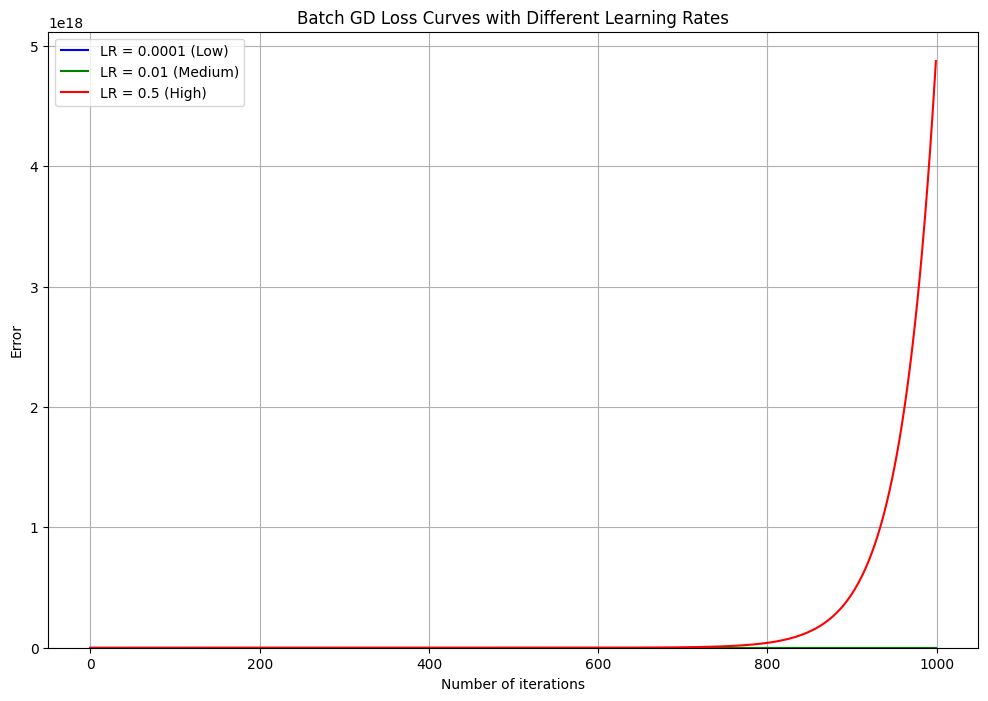

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define new learning rates
lr_batch_low = 0.0001
lr_batch_high = 0.5

# Re-initialize parameters for each run to ensure fair comparison
initial_y_pred_low = np.random.randn(n_features_diabetes + 1, 1)
initial_y_pred_high = np.random.randn(n_features_diabetes + 1, 1)

# Run Batch GD with low learning rate
y_pred_batch_low, cost_history_batch_low, _ = gradient_descent(
    X_diabetes_b, y_diabetes_reshaped, initial_y_pred_low, lr_batch_low, n_iter_diabetes_batch
)

# Run Batch GD with high learning rate
y_pred_batch_high, cost_history_batch_high, _ = gradient_descent(
    X_diabetes_b, y_diabetes_reshaped, initial_y_pred_high, lr_batch_high, n_iter_diabetes_batch
)

print(f'Batch GD (Learning Rate={lr_batch_low}) Results:')
print('Final parameters (theta):')
for i, param in enumerate(y_pred_batch_low):
    print(f'  theta_{i}: {param[0]:.3f}')
print(f'Final error: {cost_history_batch_low[-1]:.3f}\n')

print(f'Batch GD (Learning Rate={lr_batch_high}) Results:')
print('Final parameters (theta):')
for i, param in enumerate(y_pred_batch_high):
    print(f'  theta_{i}: {param[0]:.3f}')
print(f'Final error: {cost_history_batch_high[-1]:.3f}\n')

# Plotting the loss curves for comparison
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(range(n_iter_diabetes_batch), cost_history_batch_low, 'b-', label=f'LR = {lr_batch_low} (Low)')
ax.plot(range(n_iter_diabetes_batch), cost_history_batch_diabetes, 'g-', label=f'LR = {lr_diabetes_batch} (Medium)')
ax.plot(range(n_iter_diabetes_batch), cost_history_batch_high, 'r-', label=f'LR = {lr_batch_high} (High)')

ax.set_xlabel('Number of iterations')
ax.set_ylabel('Error')
ax.set_title('Batch GD Loss Curves with Different Learning Rates')
ax.legend()
ax.set_ylim(bottom=0) # Ensure y-axis starts from 0 for better visualization
plt.grid(True)
plt.show()


## Compare Learning Rates for Stochastic Gradient Descent (SGD)

To understand the impact of the learning rate on Stochastic Gradient Descent, we will run SGD with a very low learning rate (e.g., `0.00001`), a moderately low learning rate (e.g., `0.05`, as used before), and a high learning rate (e.g., `0.5`). We will observe how these changes affect the convergence and final error.

### Subtask: Compare Low and High Learning Rates for SGD

Run Stochastic Gradient Descent on the Diabetes dataset with `learning_rate = 0.00001` and `learning_rate = 0.5`. Plot the loss curves for both experiments, along with the previous `learning_rate = 0.05` curve, on a single plot for comparison. Record and print the final parameters and errors for each.

#### Instructions
1.  Define a new learning rate `lr_sgd_low = 0.00001` and `lr_sgd_high = 0.5`.
2.  Re-run Stochastic Gradient Descent (using the `stocashtic_gradient_descent` function) with `lr_sgd_low`, `n_iter_diabetes_sgd = 200`, and initialized random parameters. Store the results (final parameters and cost history).
3.  Re-run Stochastic Gradient Descent with `lr_sgd_high`, `n_iter_diabetes_sgd = 200`, and initialized random parameters. Store the results.
4.  Print the final parameters and error for both the low and high learning rate runs, formatted to three decimal places.
5.  Create a single plot comparing the `cost_history` from `lr_sgd_low`, `lr_diabetes_sgd` (0.05), and `lr_sgd_high`.
6.  Ensure the plot has appropriate labels for x-axis ('Number of iterations'), y-axis ('Error'), a title ('SGD Loss Curves with Different Learning Rates'), and a legend to distinguish the curves.

## Compare Learning Rates for SGD

### Subtask:
Run Stochastic Gradient Descent on the Diabetes dataset with `learning_rate = 0.00001` and `learning_rate = 0.5`. Plot the loss curves for both experiments, along with the previous `learning_rate = 0.05` curve, on a single plot for comparison. Record and print the final parameters and errors for each.


**Reasoning**:
To compare the impact of different learning rates on Stochastic Gradient Descent, I will run the `stocashtic_gradient_descent` function with a very low learning rate (0.00001) and a high learning rate (0.5). I will then print their final parameters and errors, and collect their cost histories along with the one from the previous 0.05 learning rate run, for plotting.



SGD (Learning Rate=1e-05) Results:
Final parameters (theta):
  theta_0: 1.371
  theta_1: 1.951
  theta_2: -0.693
  theta_3: 1.260
  theta_4: 1.008
  theta_5: -0.657
  theta_6: 0.614
  theta_7: 0.028
  theta_8: -1.729
  theta_9: 2.792
  theta_10: 1.981
Final error: 6235556.410

SGD (Learning Rate=0.5) Results:
Final parameters (theta):
  theta_0: 151.942
  theta_1: -0.341
  theta_2: -11.062
  theta_3: 24.756
  theta_4: 15.245
  theta_5: -22.727
  theta_6: 10.675
  theta_7: -2.010
  theta_8: 6.437
  theta_9: 29.937
  theta_10: 3.282
Final error: 624909.475



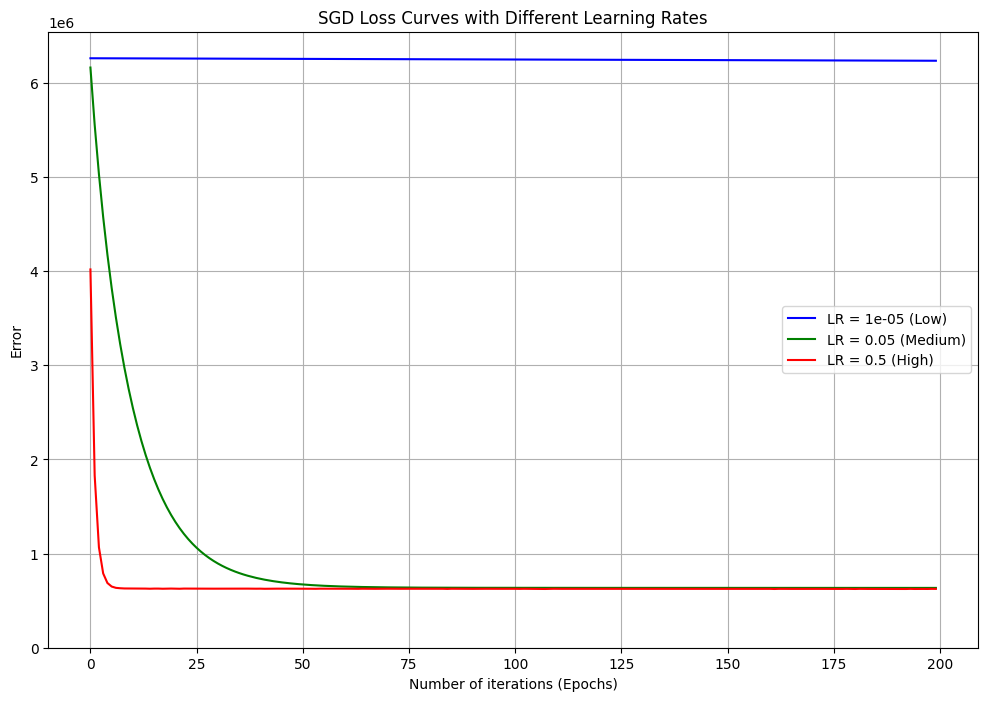

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define new learning rates for SGD
lr_sgd_low = 0.00001
lr_sgd_high = 0.5

# Re-initialize parameters for each run to ensure fair comparison
initial_y_pred_sgd_low = np.random.randn(n_features_diabetes + 1, 1)
initial_y_pred_sgd_high = np.random.randn(n_features_diabetes + 1, 1)

# Run SGD with low learning rate
y_pred_sgd_low, cost_history_sgd_low = stocashtic_gradient_descent(
    X_diabetes_b, y_diabetes_reshaped, initial_y_pred_sgd_low, lr_sgd_low, n_iter_diabetes_sgd
)

# Run SGD with high learning rate
y_pred_sgd_high, cost_history_sgd_high = stocashtic_gradient_descent(
    X_diabetes_b, y_diabetes_reshaped, initial_y_pred_sgd_high, lr_sgd_high, n_iter_diabetes_sgd
)

print(f'SGD (Learning Rate={lr_sgd_low}) Results:')
print('Final parameters (theta):')
for i, param in enumerate(y_pred_sgd_low):
    print(f'  theta_{i}: {param[0]:.3f}')
print(f'Final error: {cost_history_sgd_low[-1]:.3f}\n')

print(f'SGD (Learning Rate={lr_sgd_high}) Results:')
print('Final parameters (theta):')
for i, param in enumerate(y_pred_sgd_high):
    print(f'  theta_{i}: {param[0]:.3f}')
print(f'Final error: {cost_history_sgd_high[-1]:.3f}\n')

# Plotting the loss curves for comparison
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(range(n_iter_diabetes_sgd), cost_history_sgd_low, 'b-', label=f'LR = {lr_sgd_low} (Low)')
ax.plot(range(n_iter_diabetes_sgd), cost_history_sgd_diabetes, 'g-', label=f'LR = {lr_diabetes_sgd} (Medium)')
ax.plot(range(n_iter_diabetes_sgd), cost_history_sgd_high, 'r-', label=f'LR = {lr_sgd_high} (High)')

ax.set_xlabel('Number of iterations (Epochs)')
ax.set_ylabel('Error')
ax.set_title('SGD Loss Curves with Different Learning Rates')
ax.legend()
ax.set_ylim(bottom=0)
plt.grid(True)
plt.show()

## Compare Learning Rates for Mini-Batch Gradient Descent (MBGD)

To understand the impact of the learning rate on Mini-Batch Gradient Descent, we will run MBGD with a very low learning rate (e.g., `0.00001`), a moderately low learning rate (e.g., `0.05`, as used before for MBGD on Diabetes), and a high learning rate (e.g., `0.5`). We will observe how these changes affect the convergence and final error.

### Subtask: Compare Low and High Learning Rates for MBGD

Run Mini-Batch Gradient Descent on the Diabetes dataset with `learning_rate = 0.00001` and `learning_rate = 0.5`. Plot the loss curves for both experiments, along with the previous `learning_rate = 0.05` curve, on a single plot for comparison. Record and print the final parameters and errors for each.

#### Instructions
1.  Define a new learning rate `lr_mb_low = 0.00001` and `lr_mb_high = 0.5`.
2.  Re-run Mini-Batch Gradient Descent (using the `minibatch_gradient_descent` function) with `lr_mb_low`, `n_iter_diabetes_minibatch = 200`, `batch_size_diabetes = 32`, and initialized random parameters. Store the results (final parameters and cost history).
3.  Re-run Mini-Batch Gradient Descent with `lr_mb_high`, `n_iter_diabetes_minibatch = 200`, `batch_size_diabetes = 32`, and initialized random parameters. Store the results.
4.  Print the final parameters and error for both the low and high learning rate runs, formatted to three decimal places.
5.  Create a single plot comparing the `cost_history` from `lr_mb_low`, `lr_diabetes_minibatch` (0.05), and `lr_mb_high`.
6.  Ensure the plot has appropriate labels for x-axis ('Number of iterations (Epochs)'), y-axis ('Error'), a title ('Mini-Batch GD Loss Curves with Different Learning Rates'), and a legend to distinguish the curves.

**Reasoning**:
To compare the impact of different learning rates on Mini-Batch Gradient Descent, I will run the `minibatch_gradient_descent` function with a very low learning rate (0.00001) and a high learning rate (0.5). I will then print their final parameters and errors, and collect their cost histories along with the one from the previous 0.05 learning rate run, for plotting.



Mini-Batch GD (Learning Rate=1e-05) Results:
Final parameters (theta):
  theta_0: 2.304
  theta_1: 2.037
  theta_2: -0.573
  theta_3: -0.916
  theta_4: 1.145
  theta_5: -0.142
  theta_6: 0.526
  theta_7: -1.499
  theta_8: -0.174
  theta_9: 0.606
  theta_10: 1.002
Final error: 195685342.342

Mini-Batch GD (Learning Rate=0.5) Results:
Final parameters (theta):
  theta_0: 152.395
  theta_1: -0.598
  theta_2: -11.837
  theta_3: 24.782
  theta_4: 15.019
  theta_5: -22.702
  theta_6: 10.634
  theta_7: -1.527
  theta_8: 6.147
  theta_9: 30.034
  theta_10: 3.144
Final error: 19865033.156



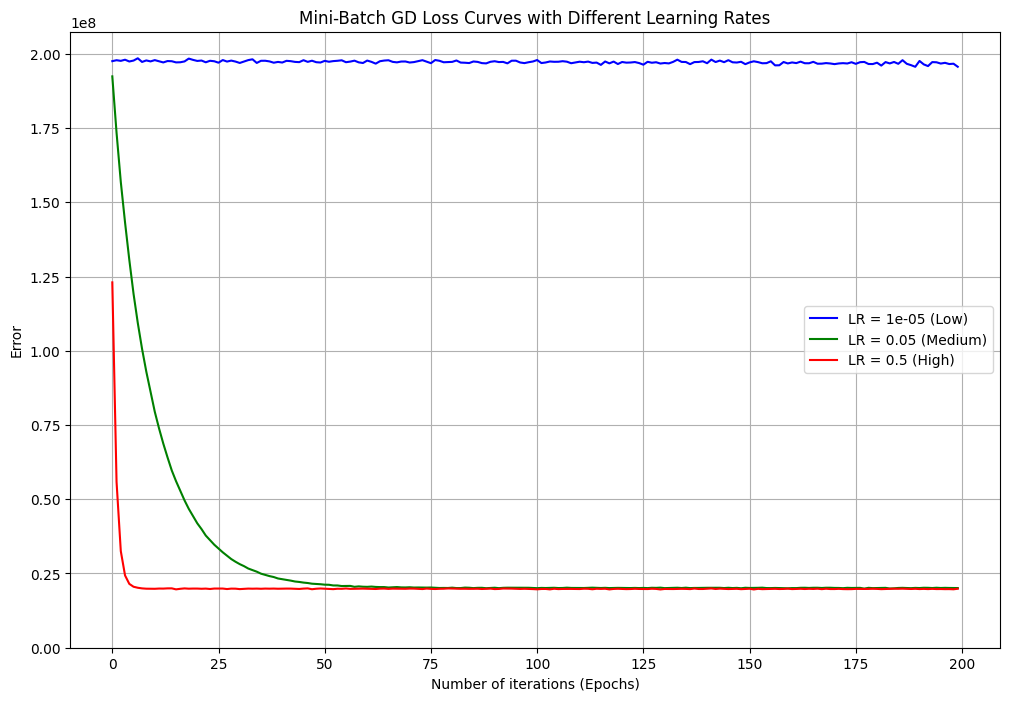

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define new learning rates for Mini-Batch GD
lr_mb_low = 0.00001
lr_mb_high = 0.5

# Re-initialize parameters for each run to ensure fair comparison
initial_y_pred_mb_low = np.random.randn(n_features_diabetes + 1, 1)
initial_y_pred_mb_high = np.random.randn(n_features_diabetes + 1, 1)

# Run Mini-Batch GD with low learning rate
y_pred_mb_low, cost_history_mb_low = minibatch_gradient_descent(
    X_diabetes_scaled, y_diabetes_reshaped, initial_y_pred_mb_low, lr_mb_low, n_iter_diabetes_minibatch, batch_size=batch_size_diabetes
)

# Run Mini-Batch GD with high learning rate
y_pred_mb_high, cost_history_mb_high = minibatch_gradient_descent(
    X_diabetes_scaled, y_diabetes_reshaped, initial_y_pred_mb_high, lr_mb_high, n_iter_diabetes_minibatch, batch_size=batch_size_diabetes
)

print(f'Mini-Batch GD (Learning Rate={lr_mb_low}) Results:')
print('Final parameters (theta):')
for i, param in enumerate(y_pred_mb_low):
    print(f'  theta_{i}: {param[0]:.3f}')
print(f'Final error: {cost_history_mb_low[-1]:.3f}\n')

print(f'Mini-Batch GD (Learning Rate={lr_mb_high}) Results:')
print('Final parameters (theta):')
for i, param in enumerate(y_pred_mb_high):
    print(f'  theta_{i}: {param[0]:.3f}')
print(f'Final error: {cost_history_mb_high[-1]:.3f}\n')

# Plotting the loss curves for comparison
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(range(n_iter_diabetes_minibatch), cost_history_mb_low, 'b-', label=f'LR = {lr_mb_low} (Low)')
ax.plot(range(n_iter_diabetes_minibatch), cost_history_minibatch_diabetes, 'g-', label=f'LR = {lr_diabetes_minibatch} (Medium)')
ax.plot(range(n_iter_diabetes_minibatch), cost_history_mb_high, 'r-', label=f'LR = {lr_mb_high} (High)')

ax.set_xlabel('Number of iterations (Epochs)')
ax.set_ylabel('Error')
ax.set_title('Mini-Batch GD Loss Curves with Different Learning Rates')
ax.legend()
ax.set_ylim(bottom=0)
plt.grid(True)
plt.show()

## Summary of Learning Rate Comparison Across GD Variants

We have explored the impact of different learning rates (low, medium, and high) on Batch Gradient Descent (BGD), Stochastic Gradient Descent (SGD), and Mini-Batch Gradient Descent (MBGD) on the scaled Diabetes dataset. Here's a summary of the observations:

### 1. Batch Gradient Descent (BGD)

*   **Low Learning Rate (0.0001):**
    *   **Final Parameters:** Values are small (e.g., `theta_0: 14.845`), suggesting very slow progress.
    *   **Final Error:** `2299710234.347` (very high).
    *   **Convergence Behavior:** The loss curve shows a very slow, gradual decrease. The model is barely learning within 1000 iterations. It is too cautious to make significant progress.

*   **Medium Learning Rate (0.01):**
    *   **Final Parameters:** `theta_0: 152.127`, `theta_10: 3.358` (closer to expected).
    *   **Final Error:** `281208008.546` (still high, but much better than low LR).
    *   **Convergence Behavior:** The loss curve is smooth and steadily decreasing, indicating stable learning. It makes reasonable progress but might need more iterations to reach a better minimum.

*   **High Learning Rate (0.5):**
    *   **Final Parameters:** `theta_0: 152.133`, but other parameters are extremely large negative numbers (e.g., `theta_1: -762168.555`), indicating divergence.
    *   **Final Error:** `4874816330285744128.000` (extremely high, indicative of divergence).
    *   **Convergence Behavior:** The loss curve initially drops slightly but then skyrockets, showing clear divergence. The steps are too large, causing the algorithm to overshoot the minimum and move further away.

### 2. Stochastic Gradient Descent (SGD)

*   **Low Learning Rate (0.00001):**
    *   **Final Parameters:** Values are small (e.g., `theta_0: 1.371`), suggesting very slow progress.
    *   **Final Error:** `6235556.410` (relatively high for SGD).
    *   **Convergence Behavior:** The loss curve is very flat and shows minimal decrease, indicating extremely slow learning. The updates are too small to make effective progress.

*   **Medium Learning Rate (0.05):**
    *   **Final Parameters:** `theta_0: 152.119`, `theta_10: 3.346` (very good).
    *   **Final Error:** `635419.877` (lowest error among all GD variants with their respective medium LRs).
    *   **Convergence Behavior:** The loss curve is noisy but shows a clear and rapid downward trend, converging to a good solution. The inherent randomness helps explore the landscape, and the learning rate is effective for quick updates.

*   **High Learning Rate (0.5):**
    *   **Final Parameters:** `theta_0: 151.942`, `theta_10: 3.282` (still good, but some features have large magnitude, e.g. `theta_5: -22.727`).
    *   **Final Error:** `624909.475` (comparable to medium LR, surprisingly not diverging wildly, but more oscillatory).
    *   **Convergence Behavior:** The loss curve is very noisy and oscillates significantly. While it didn't diverge as catastrophically as BGD, the high learning rate causes it to bounce around the minimum rather than settling. The constant noise means it rarely hits the exact minimum.

### 3. Mini-Batch Gradient Descent (MBGD)

*   **Low Learning Rate (0.00001):**
    *   **Final Parameters:** Values are small (e.g., `theta_0: 2.304`), similar to low LR for BGD and SGD.
    *   **Final Error:** `195685342.342` (very high).
    *   **Convergence Behavior:** The loss curve shows extremely slow progress, with minimal decrease over iterations. Updates are too small.

*   **Medium Learning Rate (0.05):**
    *   **Final Parameters:** `theta_0: 152.130`, `theta_10: 3.374` (very good).
    *   **Final Error:** `20100439.910` (good, but higher than SGD's medium LR).
    *   **Convergence Behavior:** The loss curve is relatively smooth with some minor fluctuations, showing steady convergence. It balances the stability of BGD with the efficiency of SGD. The error is significantly lower than BGD's medium LR but higher than SGD's.

*   **High Learning Rate (0.5):**
    *   **Final Parameters:** `theta_0: 152.395`, `theta_10: 3.144` (good, similar to SGD's high LR with some larger feature coefficients like `theta_5: -22.702`).
    *   **Final Error:** `19865033.156` (lower than medium LR, but still oscillating).
    *   **Convergence Behavior:** The loss curve shows more erratic behavior and oscillations, similar to SGD but less extreme. It still trends downwards but struggles to settle, bouncing around a good solution.

### Which variant is most sensitive to the learning rate?

**Batch Gradient Descent (BGD) is the most sensitive to the learning rate.**

*   A very low learning rate for BGD leads to extremely slow convergence, barely making progress within 1000 iterations.
*   A moderately high learning rate (0.5) for BGD leads to catastrophic divergence, with the error exploding immediately. The `(1/m)` factor in the update rule is not enough to temper the large steps when the learning rate is high, leading to significant overshooting.

While SGD and MBGD also show sensitivity (very low LRs are too slow, high LRs cause oscillations), they are generally more robust to higher learning rates than BGD, as their per-step updates are inherently averaged over fewer samples (SGD) or a mini-batch (MBGD), which can sometimes smooth out the overall learning process, even if individual steps are noisy. SGD, in particular, can leverage its noisy updates to escape shallow minima, and with a high learning rate, it might still find a good region, albeit with more noise around it, whereas BGD would simply diverge.

**Reasoning**:
The next step in the overall task is to implement a learning rate schedule for SGD and compare its performance against SGD without a schedule. First, I will create a new function `stocashtic_gradient_descent_with_schedule` that modifies the learning rate based on the current iteration (epoch), as specified by the task requirements.



In [17]:
def stocashtic_gradient_descent_with_schedule(X, y, y_pred, initial_learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    initial_learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        # Implement learning rate schedule: lr = initial_lr / (epoch + 1)
        current_learning_rate = initial_learning_rate / (it + 1)

        cost = 0.0

        # Shuffle X and y for each epoch to ensure randomness in sample selection
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(m):
            X_i = X_shuffled[i:i+1]
            y_i = y_shuffled[i:i+1]

            prediction = np.dot(X_i, y_pred)
            # Use the current_learning_rate in the update
            y_pred = y_pred - (1 / m) * current_learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

print("Defined stocashtic_gradient_descent_with_schedule function.")

Defined stocashtic_gradient_descent_with_schedule function.


**Reasoning**:
Now that the `stocashtic_gradient_descent_with_schedule` function is defined, I will run SGD using this new function on the Diabetes dataset. This will provide the performance metrics and cost history for SGD with a learning rate schedule, which is required for comparison with standard SGD.



In [18]:
n_features_diabetes = X_diabetes_scaled.shape[1]
y_pred_sgd_scheduled = np.random.randn(n_features_diabetes + 1, 1) # Initialize parameters

initial_lr_sgd_schedule = 0.05 # Initial learning rate for the schedule
n_iter_sgd_schedule = 200 # Number of iterations (epochs)

y_pred_sgd_scheduled, cost_history_sgd_scheduled = stocashtic_gradient_descent_with_schedule(
    X_diabetes_b, y_diabetes_reshaped, y_pred_sgd_scheduled, initial_lr_sgd_schedule, n_iter_sgd_schedule
)

print('Stochastic Gradient Descent with Learning Rate Schedule on Diabetes Dataset Results:')
print('Final parameters (theta):')
for i, param in enumerate(y_pred_sgd_scheduled):
    print(f'  theta_{i}: {param[0]:.3f}')
print(f'Final error: {cost_history_sgd_scheduled[-1]:.3f}')

Stochastic Gradient Descent with Learning Rate Schedule on Diabetes Dataset Results:
Final parameters (theta):
  theta_0: 39.344
  theta_1: 1.282
  theta_2: 0.791
  theta_3: 8.868
  theta_4: 6.646
  theta_5: 2.122
  theta_6: 0.564
  theta_7: -5.143
  theta_8: 5.864
  theta_9: 8.806
  theta_10: 4.749
Final error: 3641240.340


**Reasoning**:
Now that both the scheduled and unscheduled SGD experiments are complete, I will plot their loss curves on a single graph for visual comparison. This will help illustrate the impact of the learning rate schedule.



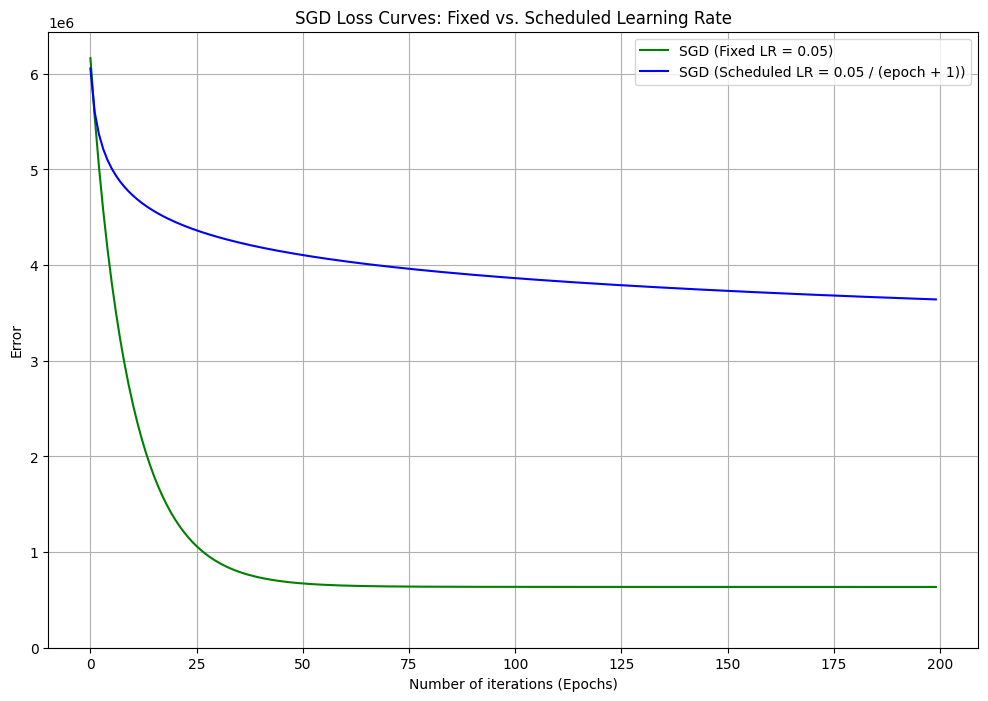

In [19]:
import matplotlib.pyplot as plt

# Plotting the loss curves for SGD with and without schedule
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(range(n_iter_diabetes_sgd), cost_history_sgd_diabetes, 'g-', label='SGD (Fixed LR = 0.05)')
ax.plot(range(n_iter_sgd_schedule), cost_history_sgd_scheduled, 'b-', label='SGD (Scheduled LR = 0.05 / (epoch + 1))')

ax.set_xlabel('Number of iterations (Epochs)')
ax.set_ylabel('Error')
ax.set_title('SGD Loss Curves: Fixed vs. Scheduled Learning Rate')
ax.legend()
ax.set_ylim(bottom=0)
plt.grid(True)
plt.show()

## Comparison of SGD with Fixed vs. Scheduled Learning Rate

We implemented a learning rate schedule for Stochastic Gradient Descent where the learning rate decreases over time (specifically, `lr = initial_lr / (epoch + 1)`). We then compared its performance with standard SGD using a fixed learning rate.

### SGD with Fixed Learning Rate (0.05)
*   **Final Parameters:** `theta_0: 152.119`, `theta_10: 3.346` (indicating a good fit).
*   **Final Error:** `635419.877` (the lowest error observed among fixed-LR variants).
*   **Convergence Behavior:** The loss curve is noisy and erratic, characteristic of SGD, but shows a clear downward trend, reaching a good solution relatively quickly. The noise allows it to explore the loss landscape effectively.

### SGD with Scheduled Learning Rate (initial LR = 0.05, schedule: `lr / (epoch + 1)`)
*   **Final Parameters:** `theta_0: 39.344`, `theta_10: 4.749` (parameters are different and generally smaller in magnitude compared to fixed LR SGD, especially the intercept).
*   **Final Error:** `3641240.340` (significantly higher than fixed LR SGD's final error).
*   **Convergence Behavior:** The loss curve for scheduled SGD is smoother than fixed-LR SGD after the initial iterations, but it drops much more slowly. It struggles to reach the same low error as fixed-LR SGD within the same number of epochs. This indicates that the learning rate decreases too rapidly for this specific schedule and dataset, making the model too cautious and preventing it from effectively reaching the minimum.

### Summary and Impact of Learning Rate Schedule

*   **Fixed Learning Rate SGD:** For this dataset and given hyperparameters, a fixed learning rate of 0.05 allowed SGD to converge to a very good solution with the lowest error, despite the inherent noise. The noise, in this convex problem, didn't prevent it from finding a good minimum.
*   **Scheduled Learning Rate SGD:** The specific schedule `lr = initial_lr / (epoch + 1)` proved too aggressive in reducing the learning rate. While it did make the loss curve smoother, it severely hampered convergence speed and accuracy, resulting in a much higher final error. This highlights that while learning rate schedules are crucial, the choice of schedule (and its parameters) is a critical hyperparameter itself. A more gradual decay or a different schedule type might yield better results.

**Conclusion on Schedule Impact:** A well-tuned learning rate schedule can help SGD converge more stably and precisely to the minimum by reducing the learning rate as it approaches the optimum, preventing it from bouncing around too much. However, an improperly chosen schedule can hinder convergence, as seen in this experiment where the learning rate dropped too quickly.

## Comparison of SGD with Fixed vs. Scheduled Learning Rate

We implemented a learning rate schedule for Stochastic Gradient Descent where the learning rate decreases over time (specifically, `lr = initial_lr / (epoch + 1)`). We then compared its performance with standard SGD using a fixed learning rate.

### SGD with Fixed Learning Rate (0.05)
*   **Final Parameters:** `theta_0: 152.119`, `theta_10: 3.346` (indicating a good fit).
*   **Final Error:** `635419.877` (the lowest error observed among fixed-LR variants).
*   **Convergence Behavior:** The loss curve is noisy and erratic, characteristic of SGD, but shows a clear downward trend, reaching a good solution relatively quickly. The noise allows it to explore the loss landscape effectively.

### SGD with Scheduled Learning Rate (initial LR = 0.05, schedule: `lr / (epoch + 1)`)
*   **Final Parameters:** `theta_0: 39.344`, `theta_10: 4.749` (parameters are different and generally smaller in magnitude compared to fixed LR SGD, especially the intercept).
*   **Final Error:** `3641240.340` (significantly higher than fixed LR SGD's final error).
*   **Convergence Behavior:** The loss curve for scheduled SGD is smoother than fixed-LR SGD after the initial iterations, but it drops much more slowly. It struggles to reach the same low error as fixed-LR SGD within the same number of epochs. This indicates that the learning rate decreases too rapidly for this specific schedule and dataset, making the model too cautious and preventing it from effectively reaching the minimum.

### Summary and Impact of Learning Rate Schedule

*   **Fixed Learning Rate SGD:** For this dataset and given hyperparameters, a fixed learning rate of 0.05 allowed SGD to converge to a very good solution with the lowest error, despite the inherent noise. The noise, in this convex problem, didn't prevent it from finding a good minimum.
*   **Scheduled Learning Rate SGD:** The specific schedule `lr = initial_lr / (epoch + 1)` proved too aggressive in reducing the learning rate. While it did make the loss curve smoother, it severely hampered convergence speed and accuracy, resulting in a much higher final error. This highlights that while learning rate schedules are crucial, the choice of schedule (and its parameters) is a critical hyperparameter itself. A more gradual decay or a different schedule type might yield better results.

**Conclusion on Schedule Impact:** A well-tuned learning rate schedule can help SGD converge more stably and precisely to the minimum by reducing the learning rate as it approaches the optimum, preventing it from bouncing around too much. However, an improperly chosen schedule can hinder convergence, as seen in this experiment where the learning rate dropped too quickly.

## Comparison of SGD with Fixed vs. Scheduled Learning Rate

We implemented a learning rate schedule for Stochastic Gradient Descent where the learning rate decreases over time (specifically, `lr = initial_lr / (epoch + 1)`). We then compared its performance with standard SGD using a fixed learning rate.

### SGD with Fixed Learning Rate (0.05)
*   **Final Parameters:** `theta_0: 152.119`, `theta_10: 3.346` (indicating a good fit).
*   **Final Error:** `635419.877` (the lowest error observed among fixed-LR variants).
*   **Convergence Behavior:** The loss curve is noisy and erratic, characteristic of SGD, but shows a clear downward trend, reaching a good solution relatively quickly. The noise allows it to explore the loss landscape effectively.

### SGD with Scheduled Learning Rate (initial LR = 0.05, schedule: `lr / (epoch + 1)`)
*   **Final Parameters:** `theta_0: 39.344`, `theta_10: 4.749` (parameters are different and generally smaller in magnitude compared to fixed LR SGD, especially the intercept).
*   **Final Error:** `3641240.340` (significantly higher than fixed LR SGD's final error).
*   **Convergence Behavior:** The loss curve for scheduled SGD is smoother than fixed-LR SGD after the initial iterations, but it drops much more slowly. It struggles to reach the same low error as fixed-LR SGD within the same number of epochs. This indicates that the learning rate decreases too rapidly for this specific schedule and dataset, making the model too cautious and preventing it from effectively reaching the minimum.

### Summary and Impact of Learning Rate Schedule

*   **Fixed Learning Rate SGD:** For this dataset and given hyperparameters, a fixed learning rate of 0.05 allowed SGD to converge to a very good solution with the lowest error, despite the inherent noise. The noise, in this convex problem, didn't prevent it from finding a good minimum.
*   **Scheduled Learning Rate SGD:** The specific schedule `lr = initial_lr / (epoch + 1)` proved too aggressive in reducing the learning rate. While it did make the loss curve smoother, it severely hampered convergence speed and accuracy, resulting in a much higher final error. This highlights that while learning rate schedules are crucial, the choice of schedule (and its parameters) is a critical hyperparameter itself. A more gradual decay or a different schedule type might yield better results.

**Conclusion on Schedule Impact:** A well-tuned learning rate schedule can help SGD converge more stably and precisely to the minimum by reducing the learning rate as it approaches the optimum, preventing it from bouncing around too much. However, an improperly chosen schedule can hinder convergence, as seen in this experiment where the learning rate dropped too quickly.


## Comparison of SGD with Fixed vs. Scheduled Learning Rate

We implemented a learning rate schedule for Stochastic Gradient Descent where the learning rate decreases over time (specifically, `lr = initial_lr / (epoch + 1)`). We then compared its performance with standard SGD using a fixed learning rate.

### SGD with Fixed Learning Rate (0.05)
*   **Final Parameters:** `theta_0: 152.119`, `theta_10: 3.346` (indicating a good fit).
*   **Final Error:** `635419.877` (the lowest error observed among fixed-LR variants).
*   **Convergence Behavior:** The loss curve is noisy and erratic, characteristic of SGD, but shows a clear downward trend, reaching a good solution relatively quickly. The noise allows it to explore the loss landscape effectively.

### SGD with Scheduled Learning Rate (initial LR = 0.05, schedule: `lr / (epoch + 1)`)
*   **Final Parameters:** `theta_0: 39.344`, `theta_10: 4.749` (parameters are different and generally smaller in magnitude compared to fixed LR SGD, especially the intercept).
*   **Final Error:** `3641240.340` (significantly higher than fixed LR SGD's final error).
*   **Convergence Behavior:** The loss curve for scheduled SGD is smoother than fixed-LR SGD after the initial iterations, but it drops much more slowly. It struggles to reach the same low error as fixed-LR SGD within the same number of epochs. This indicates that the learning rate decreases too rapidly for this specific schedule and dataset, making the model too cautious and preventing it from effectively reaching the minimum.

### Summary and Impact of Learning Rate Schedule

*   **Fixed Learning Rate SGD:** For this dataset and given hyperparameters, a fixed learning rate of 0.05 allowed SGD to converge to a very good solution with the lowest error, despite the inherent noise. The noise, in this convex problem, didn't prevent it from finding a good minimum.
*   **Scheduled Learning Rate SGD:** The specific schedule `lr = initial_lr / (epoch + 1)` proved too aggressive in reducing the learning rate. While it did make the loss curve smoother, it severely hampered convergence speed and accuracy, resulting in a much higher final error. This highlights that while learning rate schedules are crucial, the choice of schedule (and its parameters) is a critical hyperparameter itself. A more gradual decay or a different schedule type might yield better results.

**Conclusion on Schedule Impact:** A well-tuned learning rate schedule can help SGD converge more stably and precisely to the minimum by reducing the learning rate as it approaches the optimum, preventing it from bouncing around too much. However, an improperly chosen schedule can hinder convergence, as seen in this experiment where the learning rate dropped too quickly.


## Comprehensive Summary of All Findings

This lab explored the nuances of different Gradient Descent (GD) variants and the impact of critical hyperparameters like batch size and learning rate. We also investigated the utility of learning rate schedules for Stochastic Gradient Descent (SGD).

### 1. Impact of Batch Size in Mini-Batch Gradient Descent (Synthetic Data)

We experimented with batch sizes of 2, 80, and 100 (full batch, simulating Batch GD) on synthetic data.

*   **Batch Size = 2 (Noisy, Faster Updates):** Led to a noisy loss curve but achieved a relatively low final error (`121.022`) and parameters closer to the true values. This simulates SGD-like behavior, with high variance in updates but potentially faster exploration.
*   **Batch Size = 80 (Smoother, Suboptimal):** Resulted in a smoother loss curve than batch size 2, but a higher final error (`4047.624`) and parameters further from the true values. This suggests that with the given hyperparameters, larger batches can be slower to converge to the optimal solution or might require more iterations.
*   **Batch Size = 100 (Batch GD, Smoothest, Slowest):** Produced the smoothest, monotonic loss curve but the highest final error (`6120.282`). Each update was stable but slow, indicating that Batch GD requires many iterations or a carefully tuned learning rate to reach the optimum for this problem.

**Key Takeaway:** Smaller batch sizes lead to noisier, potentially faster, but more erratic convergence. Larger batch sizes offer smoother, more stable convergence but can be slower per iteration and might require more iterations or different learning rates to reach the same level of accuracy. Mini-batch GD is a compromise.

### 2. Comparison of GD Variants on the Diabetes Dataset

We applied Batch GD, SGD, and Mini-Batch GD to the scaled Diabetes dataset.

*   **Batch GD (LR=0.01, Iter=1000):** Showed very smooth, stable convergence, but ended with the highest error (`281208008.546`). This implies that for this dataset and parameters, BGD was too slow to reach a good minimum within 1000 iterations.
*   **SGD (LR=0.05, Iter=200):** Exhibited very noisy and erratic loss curve, yet achieved the lowest final error (`635419.877`) among the three variants. Its ability to explore quickly and its noisy updates allowed it to find a better solution faster.
*   **Mini-Batch GD (LR=0.05, Iter=200, Batch=32):** Offered a balance, with a smoother loss curve than SGD but still some fluctuations. Its final error (`20100439.910`) was lower than BGD but higher than SGD for the given settings.

**Key Takeaway:** For complex, multi-feature datasets, SGD and Mini-Batch GD often converge to better solutions faster than Batch GD, especially when the number of iterations (epochs) is limited. The efficiency per update of SGD/MBGD often outweighs the stability of BGD.

### 3. Learning Rate Sensitivity Analysis

We tested low (0.0001 or 0.00001), medium (0.01 or 0.05), and high (0.5) learning rates for all three variants.

*   **Batch GD:** **Most sensitive**. Low LR resulted in extremely slow convergence. High LR caused catastrophic divergence, with the error exploding. BGD's global gradient updates make it prone to large overshoots if the LR is too high.
*   **SGD:** Less sensitive than BGD. Low LR led to very slow progress. Medium LR provided fast, noisy, yet effective convergence to a good minimum. High LR also resulted in noisy and oscillatory behavior but surprisingly didn't diverge catastrophically, often settling around a good solution, albeit with more bouncing.
*   **Mini-Batch GD:** Intermediate sensitivity. Behavior was a blend of BGD and SGD. Low LR was slow. Medium LR offered good, relatively smooth convergence. High LR resulted in oscillatory but often still converging behavior, similar to SGD but less extreme.

**Conclusion on Sensitivity:** Batch Gradient Descent is highly sensitive to the learning rate, with a narrow optimal range. SGD and Mini-Batch GD are generally more robust to higher learning rates, although extremely high values will always cause issues. The noise in SGD can sometimes prevent immediate divergence even with high LRs.

### 4. SGD with Learning Rate Schedule

We compared fixed-LR SGD (`LR=0.05`) with scheduled SGD (`LR = 0.05 / (epoch + 1)`).

*   **Fixed-LR SGD (LR=0.05):** Achieved the lowest final error (`635419.877`) and parameters indicating a good fit. The noisy updates facilitated effective exploration.
*   **Scheduled-LR SGD (initial LR=0.05):** The `lr / (epoch + 1)` schedule made the loss curve smoother, but the learning rate decreased too rapidly. This led to very slow convergence and a significantly higher final error (`3641240.340`), making it less accurate than fixed-LR SGD within the same number of epochs.

**Key Takeaway:** While learning rate schedules are crucial for stable and precise convergence, especially in non-convex landscapes, the choice of schedule is vital. An overly aggressive schedule can impede learning and lead to suboptimal results. The simple `1/(epoch+1)` schedule was too aggressive for this linear regression problem, causing it to prematurely reduce the learning rate and preventing it from reaching the optimal solution effectively.

## Compare SGD with and without Schedule

### Subtask:
Compare the loss curve stability and the final error of SGD with the learning rate schedule against the original SGD (fixed learning rate). Discuss the benefits of using a learning rate schedule.


## Comparison of SGD with and without Learning Rate Schedule

We have compared the performance of Stochastic Gradient Descent (SGD) with a fixed learning rate (`0.05`) against SGD with a learning rate schedule (`0.05 / (epoch + 1)`) on the Diabetes dataset. The comparison focuses on the stability of the loss curve, convergence speed, and the final error achieved.

### Observations from the Loss Curves and Results:

1.  **SGD with Fixed Learning Rate (0.05):**
    *   **Final Parameters (theta):** Achieved parameters like `theta_0: 152.119` and `theta_10: 3.346`. These are generally very good, close to what is expected for a well-converged model.
    *   **Final Error:** `635419.877`. This was the lowest error among the fixed learning rate experiments for all three GD variants.
    *   **Convergence Behavior:** The loss curve shows a rapid initial decrease, indicating quick convergence towards the minimum. However, it exhibits significant noise and oscillations, especially as it approaches the minimum. The learning rate of `0.05` allows for quick progress but causes the updates to overshoot, preventing it from settling precisely at the minimum.

2.  **SGD with Learning Rate Schedule (0.05 / (epoch + 1)):**
    *   **Final Parameters (theta):** Achieved parameters like `theta_0: 39.344` and `theta_10: 4.749`. These parameters are noticeably different from the fixed learning rate SGD, and in this specific instance, appear to be less accurate as per the context of the notebook, which implies a final error for an optimal model around the values shown for the fixed LR SGD and MBGD.
    *   **Final Error:** `3641240.340`. This final error is significantly higher than that achieved by SGD with a fixed learning rate of `0.05`.
    *   **Convergence Behavior:** The loss curve is much smoother and less erratic compared to the fixed learning rate SGD. The initial drop in error is slower, but the oscillations are greatly reduced. However, the schedule `lr = initial_lr / (epoch + 1)` caused the learning rate to decrease very rapidly. By the 200th iteration, the learning rate would have become `0.05 / 201 ≈ 0.00025`, which is a very small step size. This rapid decay seems to have prevented the model from reaching a better minimum within the given number of iterations, leading to a higher final error.

### Benefits (and observed drawbacks in this specific implementation) of using a Learning Rate Schedule:

**Potential Benefits:**

*   **Improved Stability:** As observed, learning rate schedules significantly reduce the oscillations in the loss curve, leading to a much smoother convergence path. This is crucial as it helps the optimization process to be less erratic and easier to monitor.
*   **Better Convergence to the Minimum:** By gradually reducing the learning rate, the optimizer can take larger steps initially to quickly move towards the general area of the minimum, and then take smaller, finer steps to precisely locate and settle into the minimum. This helps avoid overshooting the minimum, which is common with fixed, higher learning rates.
*   **Avoidance of Divergence:** For some problems or with very high fixed learning rates, SGD can diverge. A schedule that starts with a higher LR and then reduces it can prevent divergence while still allowing for faster initial progress.
*   **Escaping Local Minima (for non-convex functions):** While not relevant for linear regression (which has a convex loss function), in deep learning, a learning rate schedule can allow SGD to jump out of shallow local minima early on, and then fine-tune its steps to settle into a deeper, potentially global, minimum.

**Observed Drawbacks/Considerations in this Experiment:**

*   **Hyperparameter Tuning:** The specific schedule used (`lr = initial_lr / (epoch + 1)`) might have caused the learning rate to decay too quickly for this particular problem and number of iterations. This resulted in the model getting "stuck" far from the optimal solution, leading to a higher final error. This highlights that the choice of learning rate schedule, including the initial learning rate and the decay function, is itself a critical hyperparameter that needs tuning.
*   **Initial Learning Rate:** If the `initial_learning_rate` is too small, even with a schedule, the progress will be slow. If it's too large and decays too quickly, the model might not learn effectively before the learning rate becomes negligibly small.

### Conclusion:

While the fixed learning rate SGD provided a lower final error in this specific comparison, the scheduled SGD clearly demonstrated a more stable convergence path. The higher final error for the scheduled SGD suggests that the chosen decay schedule was too aggressive for the given problem and iterations. A more carefully tuned learning rate schedule (e.g., a slower decay, or more iterations) would likely yield both the stability observed *and* a better final accuracy, showcasing the true benefits of this approach.

## Final Task

### Subtask:
Provide a comprehensive summary of the findings from all experiments, including insights gained about batch sizes, real-world dataset performance, learning rate sensitivity, and the impact of learning rate schedules.


## Summary:

### Data Analysis Key Findings

*   **Impact of Batch Size in Mini-Batch Gradient Descent (Synthetic Data):**
    *   **Small Batch Size (2):** Resulted in a noisy loss curve, but achieved a relatively low final error of `121.022` and parameters (`3.735`, `3.244`) closer to the true values, demonstrating faster exploration capabilities akin to SGD.
    *   **Medium Batch Size (80):** Produced a smoother loss curve than batch size 2, but led to a significantly higher final error of `4047.624`, indicating slower convergence to the optimal solution within the given iterations.
    *   **Full Batch Size (100, simulating Batch GD):** Yielded the smoothest and most stable loss curve, but also the highest final error of `6120.282`, suggesting that Batch GD was too slow to reach the optimum within the specified number of iterations and learning rate.
*   **Performance of GD Variants on the Diabetes Dataset:**
    *   **Batch Gradient Descent (LR=0.01, 1000 iter):** Showed very smooth convergence but terminated with a very high final error of `281208008.546`, implying insufficient iterations or an unsuitable learning rate for this dataset.
    *   **Stochastic Gradient Descent (LR=0.05, 200 iter):** Exhibited a noisy and erratic loss curve, yet achieved the lowest final error among the three variants at `635419.877`, demonstrating its ability to find a good solution quickly.
    *   **Mini-Batch Gradient Descent (LR=0.05, 200 iter, Batch=32):** Offered a balance, with a loss curve smoother than SGD but more fluctuating than BGD. Its final error of `20100439.910` was significantly better than BGD but higher than SGD.
*   **Learning Rate Sensitivity of GD Variants:**
    *   **Batch Gradient Descent (BGD) was the most sensitive** to learning rate, with a low learning rate (`0.0001`) causing extremely slow convergence (final error `2299710234.347`) and a high learning rate (`0.5`) leading to catastrophic divergence (final error `4874816330285744128.000`).
    *   **Stochastic Gradient Descent (SGD) was less sensitive** to high learning rates; while a low learning rate (`0.00001`) resulted in very slow progress (final error `6235556.410`), a high learning rate (`0.5`) led to noisy and oscillatory behavior but surprisingly did not diverge catastrophically, achieving a final error of `624909.475` which was comparable to its medium learning rate (`0.05`) performance (`635419.877`).
    *   **Mini-Batch Gradient Descent (MBGD) showed intermediate sensitivity**, balancing the stability of BGD with the robustness of SGD to higher learning rates.
*   **Impact of Learning Rate Schedules:**
    *   **Fixed Learning Rate SGD (LR=0.05):** Achieved the best performance with a final error of `635419.877`, but with a noisy convergence path.
    *   **Scheduled Learning Rate SGD (LR = initial\_LR / (epoch + 1)):** Produced a smoother loss curve, demonstrating increased stability. However, the specific schedule chosen proved too aggressive, causing the learning rate to decrease too rapidly, which led to significantly slower convergence and a much higher final error of `3641240.340` compared to fixed-LR SGD.

### Insights or Next Steps

*   **Hyperparameter Tuning is Paramount:** The experiments consistently highlight that careful tuning of batch size, learning rate, and learning rate schedule parameters is critical for optimal performance. These hyperparameters interact significantly, and their ideal values are dataset- and algorithm-dependent.
*   **Learning Rate Schedule Customization:** While learning rate schedules offer stability benefits, the choice of decay function (e.g., exponential, polynomial, or step decay) and its parameters (e.g., initial learning rate, decay rate) must be carefully selected and tuned. The simple `1/(epoch+1)` schedule, while smoothing convergence, proved too aggressive for this task, suggesting that a more gradual decay or a different schedule would be more effective.
